#Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
myDirFiles = "/content/drive/MyDrive/Pandas"
os.chdir(myDirFiles)

#Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

#Latar belakang masalah
 •	Hotel DTS merupakan hotel yang terdapat di Eropa.\
•	Hotel DTS memiliki masalah besar karena rasio kepuasan pelanggan terhadap pelayanan hotel masih di bawah 50%.\
•	Kami ingin memahami pola dari data pelanggan yang merasa puas dan yang netral atau tidak puas dengan pelayanan hotel berdasarkan scoring.\
•	Dengan pola tersebut, kami bisa mendapatkan faktor-faktor pelayanan yang mempengaruhi kepuasan pelanggan agar hotel dapat memperbaiki pelayanannya terkhususnya kepada pelanggan yang kemungkinannya berpotensi netral atau tidak puas, sehingga pelanggan tersebut akhirnya bisa puas dengan pelayanan hotel tersebut.\
•	Kendala:Bagaimana membuat model yang dapat melakukan prediksi apakah pelanggan puas atau netral/tidak puas terhadap pelayanan hotel?




#Tujuan
Bisnis : Meningkatkan rating kepuasan pelanggan terhadap pelayanan hotel.\
Data mining : 
-	Menemukan pola yang tersembunyi dari data pelanggan yang puas dan netral atau tidak puas dengan pelayanan hotel.
-	Memprediksi pelanggan itu puas atau netral/tidak puas.
Berdasarkan dataset “Europe Hotel Satisfaction Score”,
Sumber: https://www.kaggle.com/datasets/ishansingh88/europe-hotel-satisfaction-score/code




#EDA

In [ ]:
# load the data
df = pd.read_csv('Dataset6_Hotel_Satisfaction.csv')
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


##Check Shape Dataset

In [ ]:
df.shape
print('Ukuran dari Dataset adalah:',df.shape)

Ukuran dari Dataset adalah: (103904, 17)


Total baris data adalah 103904 dan total kolomnya adalah 17

##Check Missing Value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

Ternyata dataset tidak memiliki missing values

In [ ]:
df.isnull().sum().reset_index(name = "Nilai Missing").set_index("index")

,Nilai Missing
index,
id,0
Gender,0
Age,0
purpose_of_travel,0
Type of Travel,0
Type Of Booking,0
Hotel wifi service,0
Departure/Arrival convenience,0
Ease of Online booking,0


##Check How many labels on each feature

In [ ]:
for col in df.columns:
  print(col, ':', len(df[col].unique()),'labels')

id : 103904 labels
Gender : 2 labels
Age : 75 labels
purpose_of_travel : 5 labels
Type of Travel : 2 labels
Type Of Booking : 3 labels
Hotel wifi service : 6 labels
Departure/Arrival  convenience : 6 labels
Ease of Online booking : 6 labels
Hotel location : 6 labels
Food and drink : 6 labels
Stay comfort : 6 labels
Common Room entertainment : 6 labels
Checkin/Checkout service : 6 labels
Other service : 6 labels
Cleanliness : 6 labels
satisfaction : 2 labels


Berikut adalah jumlah unique label dari Dataset di masing-masing kolom

##Melihat unique label dari masing-masing feature

In [ ]:
#Melihat unique kolom tersebut
for col in df.columns:
  print(col)
  print(df[col].unique())

id
[ 70172   5047 110028 ...  68825  54173  62567]
Gender
['Male' 'Female']
Age
[13 25 26 61 47 52 41 20 24 12 53 33 45 38  9 17 43 58 23 57 49 36 22 31
 15 35 67 37 40 34 39 50 29 54 21 28 27 69 60 48 59 46 30 66 64 44 51 32
 19 42 16 11 62  8 56 68 55 18 65 72 70 63 10  7 14 80 74 71 85 73 76 77
 75 79 78]
purpose_of_travel
['aviation' 'tourism' 'business' 'academic' 'personal']
Type of Travel
['Personal Travel' 'Group Travel']
Type Of Booking
['Not defined' 'Group bookings' 'Individual/Couple']
Hotel wifi service
[3 2 4 1 5 0]
Departure/Arrival  convenience
[4 2 5 3 1 0]
Ease of Online booking
[3 2 5 4 1 0]
Hotel location
[1 3 2 5 4 0]
Food and drink
[5 1 2 4 3 0]
Stay comfort
[5 1 2 3 4 0]
Common Room entertainment
[5 1 2 3 4 0]
Checkin/Checkout service
[4 1 3 5 2 0]
Other service
[5 4 3 1 2 0]
Cleanliness
[5 1 2 3 4 0]
satisfaction
['neutral or dissatisfied' 'satisfied']


Jika kita lihat dari label unique di atas, ada hal yang ganjil yaitu pada label Type Of Booking karena ada tipe yang 'Not Defined'. Hal itu kemudian memberikan gambaran yang tidak jelas pada kolom target yaitu satisfaction.

Selanjutnya kita akan melihat sebaran data dari Type of booking

In [ ]:
print(df['Type Of Booking'].value_counts())
print(df['Type Of Booking'].value_counts(normalize=True))

Group bookings       49665
Individual/Couple    46745
Not defined           7494
Name: Type Of Booking, dtype: int64
Group bookings       0.477989
Individual/Couple    0.449886
Not defined          0.072124
Name: Type Of Booking, dtype: float64


Jika dilihat maka jumlah data yang Not Defined ada 7494 atau sekitar 7.2%. Maka dari itu kita bisa melakukan filter atau drop pada data tersebut karena persentasenya yang kecil

In [ ]:
df=df.loc[(df['Type Of Booking'] == 'Group bookings') | (df['Type Of Booking'] == 'Individual/Couple')]
print('Ukuran dataset setelah dilakukan drop:',df.shape)

Ukuran dataset setelah dilakukan drop: (96410, 17)


Setelah dilakukan filter maka jumlah barisnya menjadi 96.410 data. Berikutnya Dataframe inilah yang akan kita gunakan untuk tahap selanjutnya.

##Check Duplicated

Dikarenakan nilai ID merupakan unique di semua baris maka kita akan mencari nilai duplicated berdasarkan Idnya

In [ ]:
df[df['id'].duplicated()]

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction


Tidak ditemukan data duplicated di dataset

##Check Outliers

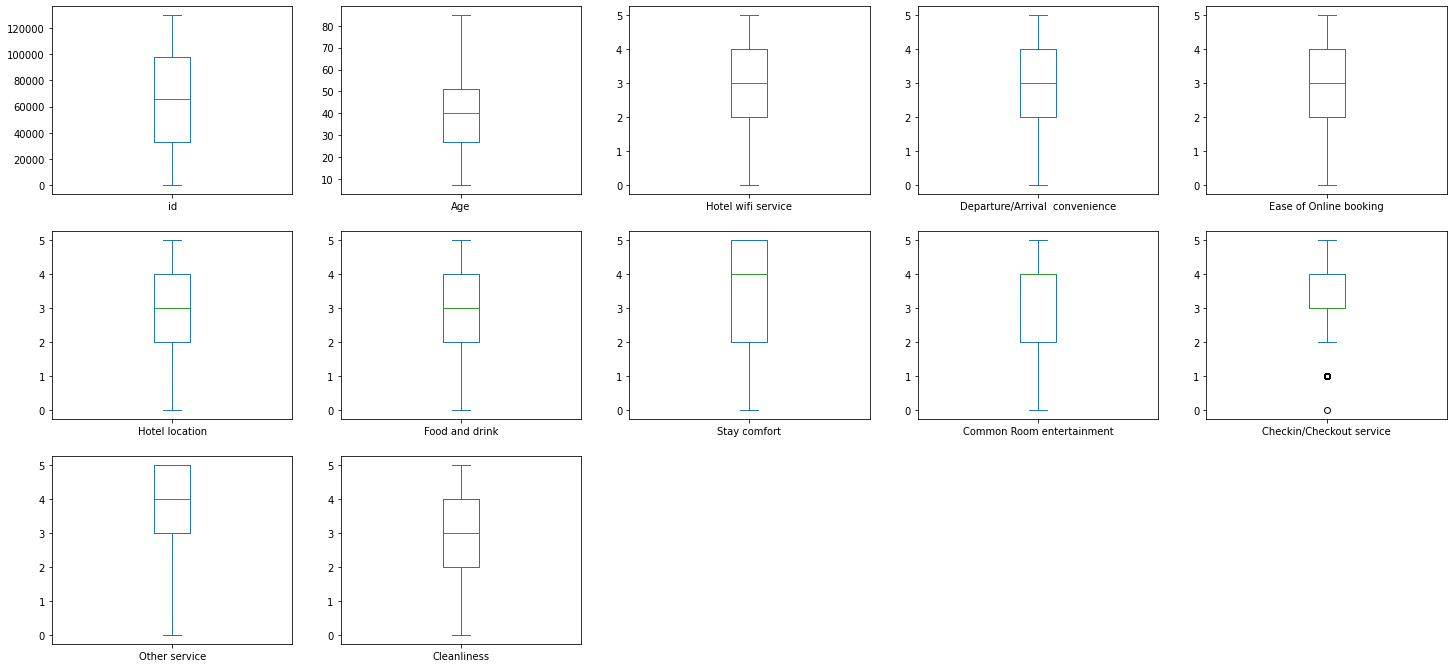

In [ ]:
df.plot(kind = 'box', subplots=True, figsize=(25,20), layout = (5,5))
plt.show()

Jika kita lihat box plot di atas, maka kita hanya akan menemukan outlier pada data checkin/checkout service yang jumlahnya juga sedikit dengan skala 0-5. Maka dari itu kita bisa mengabaikan data outliers tersebut tanpa perlu melakukan handling outliers

##Melihat Distribusi data Label target

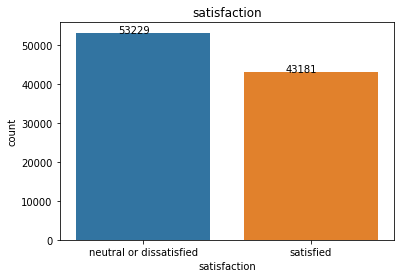

In [ ]:
# Observe imbalance data here 
# plt.rcParams["figure.figsize"] = [6,6]
# plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x="satisfaction", data=df)
plt.title("satisfaction")

for p in ax.patches: #Add data label
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [ ]:
df.satisfaction.value_counts(normalize=True)

neutral or dissatisfied    0.552111
satisfied                  0.447889
Name: satisfaction, dtype: float64

Terlihat bahwa Sebaran datanya lumayan seimbang dengan dissatisfied sebanyak 53.229 dan satisfied sebanyak 43.181 data. Di tahap-tahap selanjutnya kolom dissatisfied akan diubah menjadi angka 0 dan kolom satisfied akan diubah menjadi angka 1.

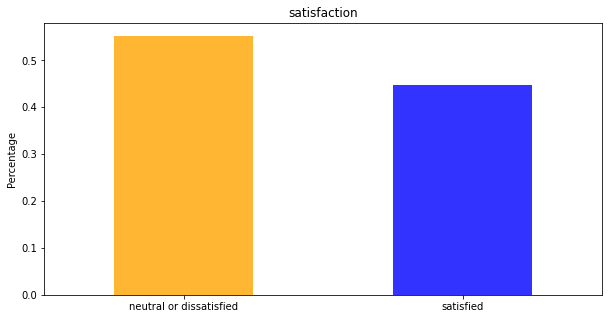

In [ ]:
plt.figure(figsize=(10,5))
plt.title("satisfaction")
plt.ylabel("Percentage")
df.satisfaction.value_counts(normalize=True).plot(kind='bar',color=['orange','blue'],rot=0,alpha =0.8)

Jika secara persentase maka untuk adalah 55:45 untuk customer yang netral/tidak puas dengan yang puas

##Visualisasi data-data kategorikal

In [ ]:
#Creating pivot table function based on target
def pivot_satisfaction(df,target):
  df_rate = pd.pivot_table(
      df[['id',target,'satisfaction']],
      index       =[target],
      columns     =['satisfaction'],
      aggfunc     ="count",
      fill_value  =0,
  ).reset_index()

  df_rate.columns=[target,'neutral or dissatisfied','satisfied']

  df_rate['total'] = df_rate['neutral or dissatisfied'] + df_rate['satisfied']
  df_rate["satisfaction Rate"] = (df_rate['satisfied']/df_rate['total'])*100
  df_rate["dissatisfied Rate"] = (df_rate['neutral or dissatisfied']/df_rate['total'])*100
  return df_rate

In [ ]:
#Creating function to plot graph
def df_cat_plot (df,target):
  cat_plot = sns.countplot(data=df, x=target, hue='satisfaction')
  sns.set(style='darkgrid')
  plt.figure(figsize=(10,5))
  plt.tight_layout()
  plt.show()
  return cat_plot

Berikut adalah visualisasi keseluruhan data kategorikal pada dataset

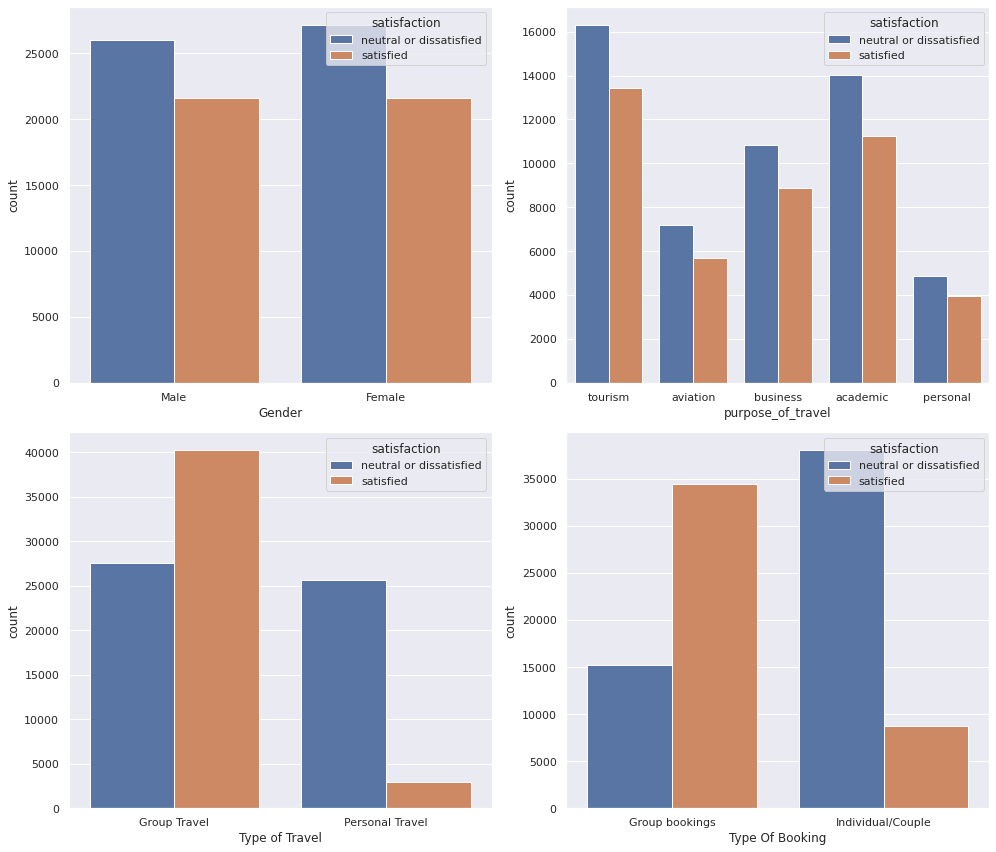

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(2,2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
plt.tight_layout()
plt.show()

Berdasarkan chart di atas kita dapat menyimpulkan:
- Pada kolom Gender, jumlah Satisfied dan Dissatisfied hampir sama jumlahnya
- Pada kolom purpose of travel, jumlah Satisfied dan Dissatisfied tertinggi ada pada tipe perjalanan tourism. Hal itu dapat diakibatkan memang perjalanan dari segi tourism adalah yang paling banyak dibandingkan yang lain.
- Pada kolom type of travel, tingkat satisfaction tinggi pada perjalanan tipe group yaitu sekitar 40k sedangkan pada perjalanan personal hanya sekitar 2500 saja
- Pada kolom type of booking, tingkat satisfaction tinggi pada tingkat booking jenis group yaitu berkisar 34k, hal itu berbanding lurus dengan tipe perjalanan kelompok, sedangkan untuk tipe booking individual/couple yang satisfy hanya sekitar 9000 berbanding lurus juga dengan tipe travel personal

##Breakdown Data kategorikal tiap feature

Kita dapat memanfaatkan fungsi pivot satisfaction untuk melihat secara detail tabel dari masinh-masing fitur

###Gender

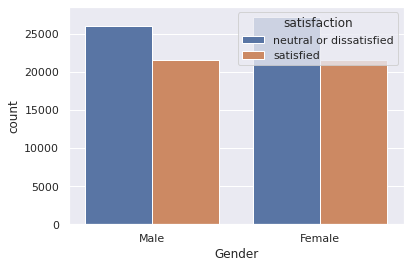

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df,"Gender")

In [ ]:
pivot_satisfaction(df,"Gender")

,Gender,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Female,27181,21604,48785,44.284104,55.715896
1,Male,26048,21577,47625,45.306037,54.693963


Kita lihat bahwa tingkat "satisfied" dan "dissatisfied" pada gender "Female" dan "Male" relatif seimbang yaitu 44.28% : 45.30% dan 55.71% :54.69% . Di sini kita melihat bahwa "Male" sedikit relatif lebih puas dengan pelayanan hotel dibanding "Female" 

###Purpose of Travel

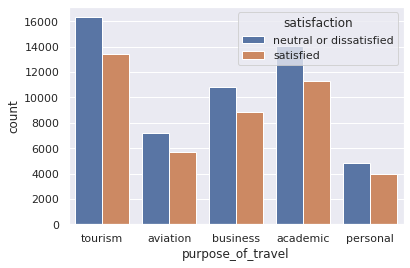

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df,"purpose_of_travel")

In [ ]:
pivot_satisfaction(df,"purpose_of_travel")

,purpose_of_travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,academic,14033,11256,25289,44.509471,55.490529
1,aviation,7211,5671,12882,44.022667,55.977333
2,business,10820,8856,19676,45.009148,54.990852
3,personal,4845,3975,8820,45.068027,54.931973
4,tourism,16320,13423,29743,45.129947,54.870053


Jika kita lihat pada grafik di atas maka terlihat jelas bahwa tujuan perjalanan "tourism" tingkat kepuasannya tinggi walaupun tingkat ketidakpuasannya juga tinggi. Namun jika kita melihat secara detail, tingkat kepuasan dari masing-masing tujuan perjalanan relatif imbang yaitu di angka 44-45% dengan "tourism" paling tinggi. Pada tingkat "neutral or dissatisfied" rating tertinggi oleh "Aviation" dengan 55.97%. Namun secara garis besar rate masing-masing tujuan perjalanan hampir sama.

###Type of Travel

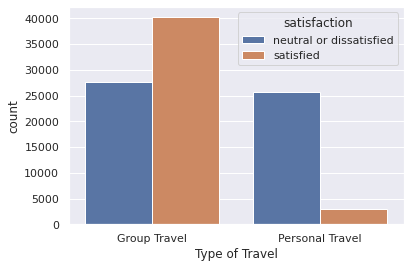

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df,"Type of Travel")

In [ ]:
pivot_satisfaction(df,"Type of Travel")

,Type of Travel,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Group Travel,27549,40216,67765,59.346270,40.653730
1,Personal Travel,25680,2965,28645,10.350847,89.649153


Jika kita lihat terdapat hal menarik di sini. Bahwa untuk perjalanan tipe "Group Travel" tingkat "Satisfaction" lumayan tinggi yaitu 59.34% berbanding terbalik dengan perjalanan tipe "Personal Travel". Bahkan "Personal Travel" mendapatkan tingkat "neutral or dissatisfied" sangat tinggi yaitu 89.64%. Hal ini bisa disimpulkan bahwa Hotel ini lebih ditujukan untuk kepentingan "Group Travel".

###Type Of Booking 

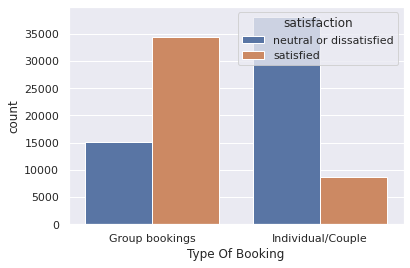

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df,"Type Of Booking")

In [ ]:
pivot_satisfaction(df,"Type Of Booking")

,Type Of Booking,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Group bookings,15185,34480,49665,69.425148,30.574852
1,Individual/Couple,38044,8701,46745,18.613755,81.386245


Hal yang sama kita jumpai pada "Type Of Booking" di mana berbanding lurus dengan "Type of Travel". Pastinya jika "Type of Travel"nya tipe "Group Travel" maka "Type of Booking"nya juga adalah tipe "Group Booking". Tingkat kepuasan pada "Group Booking" mencapai 69.42% berbanding terbalik dengan "Individual/Couple". Di sini kita bisa mendapatkan insight bahwa "Type of Booking" untuk "Couple" maka kemungkinan besar  "Type of Travel" yang diambil adalah "Group Travel" (Lebih dari 1). Faktor itulah yang membuat mengapa tingkat "neutral or dissatisfied" pada "Type of Travel" tipe "Group Travel" lumayan tinggi.

##Visualisasi nilai scoring 

Selanjutnya kita akan memvisualisasikan data scoring pada kasus ini kami anggap sebagai kategorikal walaupun berbentuk numerik karena numerik di sini merujuk kepada tingkat kepuasan dari 0-5 di mana 0 adalah buruk sekali dan 5 adalah baik sekali

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96410 entries, 1 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              96410 non-null  int64 
 1   Gender                          96410 non-null  object
 2   Age                             96410 non-null  int64 
 3   purpose_of_travel               96410 non-null  object
 4   Type of Travel                  96410 non-null  object
 5   Type Of Booking                 96410 non-null  object
 6   Hotel wifi service              96410 non-null  int64 
 7   Departure/Arrival  convenience  96410 non-null  int64 
 8   Ease of Online booking          96410 non-null  int64 
 9   Hotel location                  96410 non-null  int64 
 10  Food and drink                  96410 non-null  int64 
 11  Stay comfort                    96410 non-null  int64 
 12  Common Room entertainment       96410 non-nul

Berikut adalah visualisasi keseluruhan data scoring

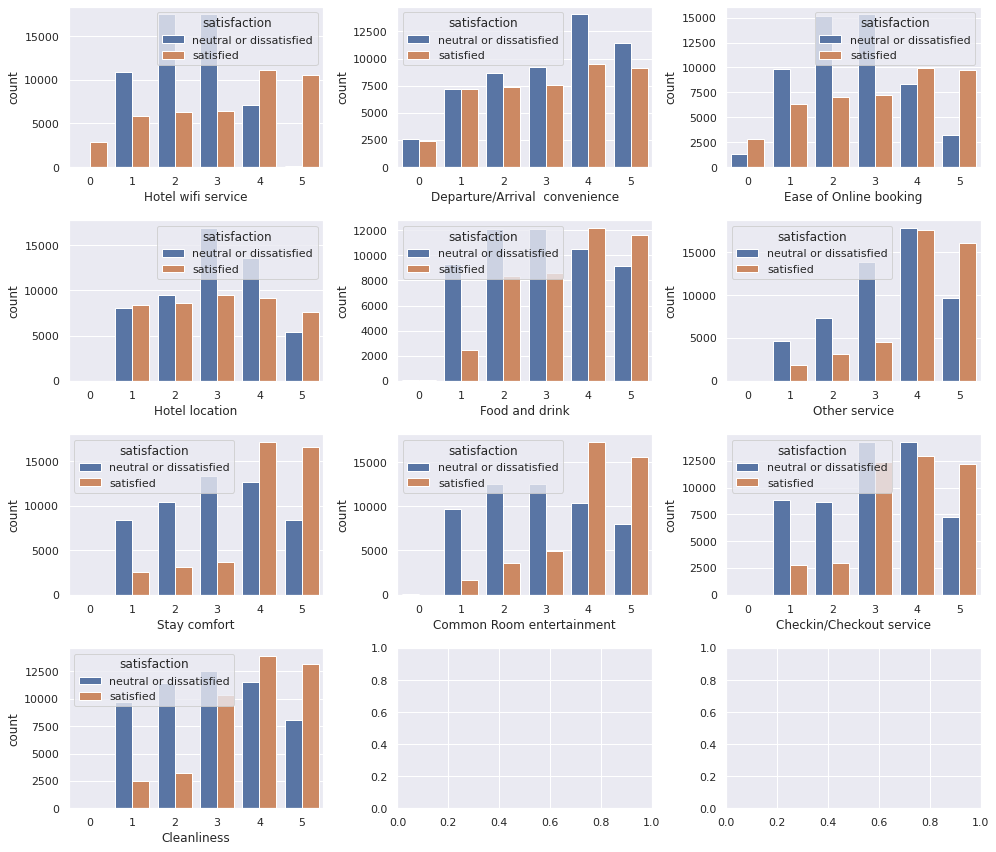

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(4,3, figsize=(14, 12))
sns.countplot(data=df, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Ease of Online booking', hue='satisfaction', ax=ax[0][2])
sns.countplot(data=df, x='Hotel location', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Food and drink', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='Other service', hue='satisfaction', ax=ax[1][2])
sns.countplot(data=df, x='Stay comfort', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df, x='Common Room entertainment', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df, x='Checkin/Checkout service', hue='satisfaction', ax=ax[2][2])
sns.countplot(data=df, x='Cleanliness', hue='satisfaction', ax=ax[3][0])
plt.tight_layout()
plt.show()

##Visualisasi data numerikal

In [ ]:
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


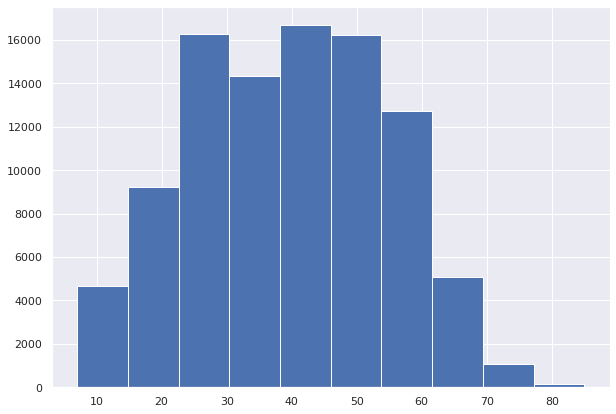

In [ ]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(df.Age)

plt.show()

Range usia yang memesan hotel dominan pada umur 20-55 dengan umur yang paling banyak adalah kisaran 39-50 sekitar 18k

Berikut sebaran data Age pada 10 data teratas

In [ ]:
df['Age'].value_counts().head(10)

39    2826
25    2602
40    2456
44    2345
42    2328
41    2328
22    2218
23    2205
43    2203
47    2201
Name: Age, dtype: int64

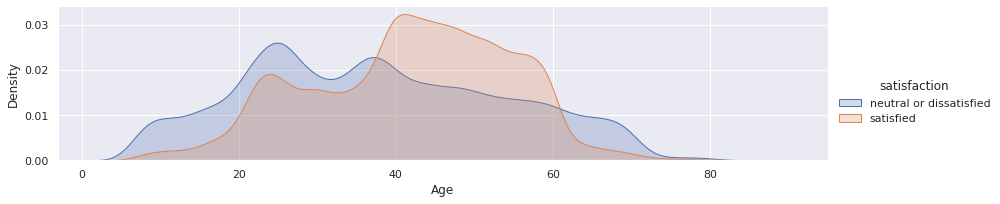

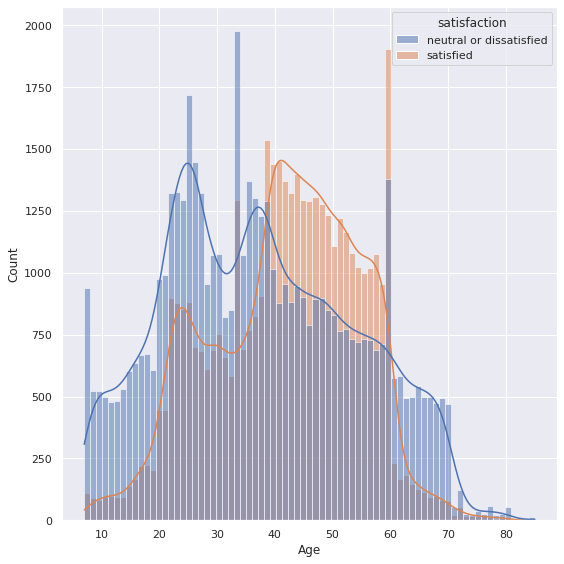

In [ ]:
facet = sns.FacetGrid(df, hue = 'satisfaction', aspect = 4)
facet.map(sns.kdeplot, "Age", shade= True)
facet.add_legend()
plt.show()

plt.rcParams["figure.figsize"] = [8,8]
plt.rcParams["figure.autolayout"] = True
sns.histplot(data = df, x = "Age", kde = True, hue = "satisfaction")

Di sini juga dapat terlihat bahwa tingkat kepuasan paling banyak ada pada kisaran range 40-60 sementara di bawah umur 40 tingkat kepuasannya rata-rata tidak puas dan juga di atas umur 60 merasa tidak puas.

In [ ]:
def age_group(age):
  if age < 40:
    return "Young"
  elif age > 60:
    return "Old"
  else:
    return "Middle"
  
df['age_group'] = df['Age'].apply(lambda age: age_group(age))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction,age_group
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied,Young
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied,Young
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied,Young
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied,Old
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied,Young
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied,Young
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied,Middle
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied,Young
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied,Young


In [ ]:
pivot_satisfaction(df,"age_group")

,age_group,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,Middle,17073,24931,42004,59.353871,40.646129
1,Old,5583,1516,7099,21.355120,78.644880
2,Young,30573,16734,47307,35.373201,64.626799


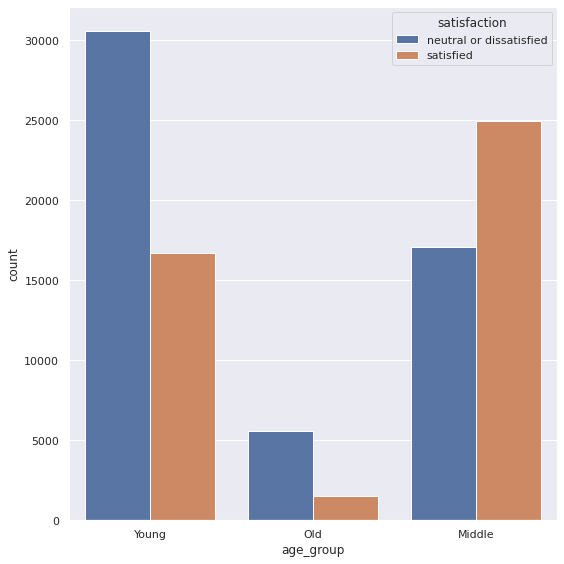

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df,"age_group")

Selanjutnya kita akan lebih berfokus kepada data dimana selain age_group yang bukan 'Middle' karena di sana ada opputunity bagaimana kita meningkatkan service kita

In [ ]:
df_iter = df.loc[:,'Hotel wifi service':'Cleanliness']

In [ ]:
df_not_mid_age = df[df['age_group'] != 'Middle']

In [ ]:
df_not_mid_age.shape

(54406, 18)

In [ ]:
for column in df_iter:
  print(column)
  print(pivot_satisfaction(df_not_mid_age,column))

Hotel wifi service
   Hotel wifi service  neutral or dissatisfied  satisfied  total  \
0                   0                        3       1647   1650   
1                   1                     7399       1967   9366   
2                   2                    11942       2202  14144   
3                   3                    11888       2204  14092   
4                   4                     4860       5214  10074   
5                   5                       64       5016   5080   

   satisfaction Rate  dissatisfied Rate  
0          99.818182           0.181818  
1          21.001495          78.998505  
2          15.568439          84.431561  
3          15.640079          84.359921  
4          51.756998          48.243002  
5          98.740157           1.259843  
Departure/Arrival  convenience
   Departure/Arrival  convenience  neutral or dissatisfied  satisfied  total  \
0                               0                     2089       1764   3853   
1                  

Visualisasi nilai scoring dengan data tanpa age group 'Middle

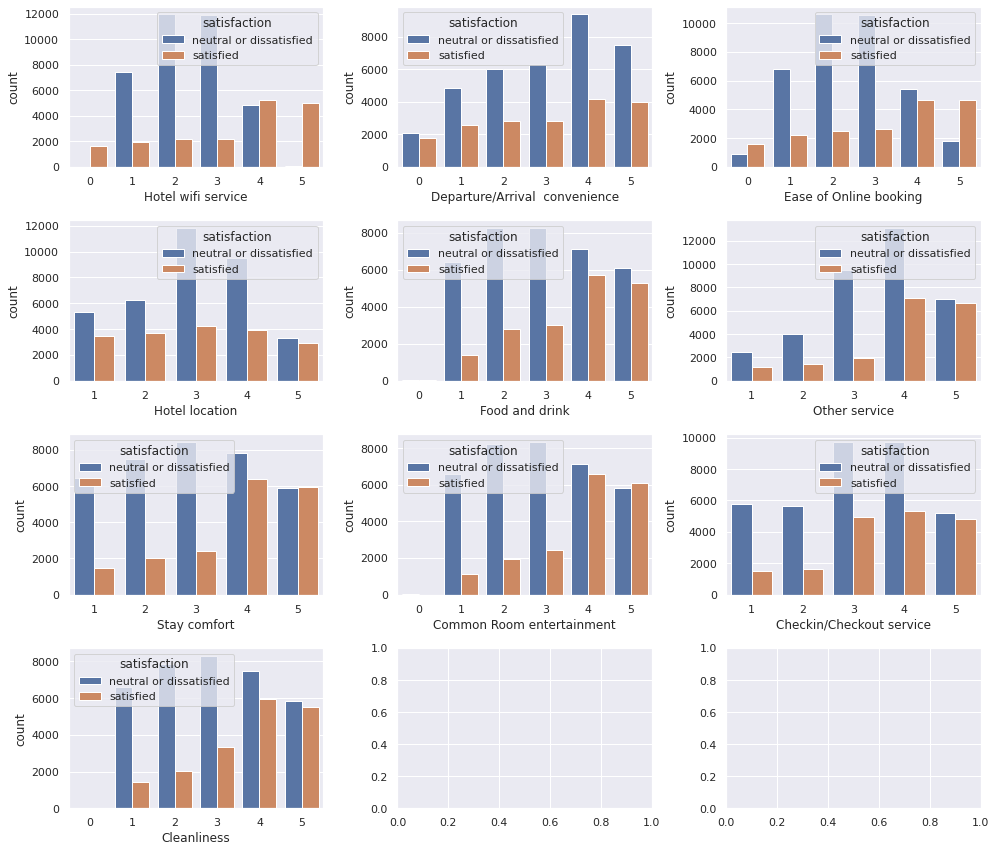

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(4,3, figsize=(14, 12))
sns.countplot(data=df_not_mid_age, x='Hotel wifi service', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df_not_mid_age, x='Departure/Arrival  convenience', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df_not_mid_age, x='Ease of Online booking', hue='satisfaction', ax=ax[0][2])
sns.countplot(data=df_not_mid_age, x='Hotel location', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df_not_mid_age, x='Food and drink', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df_not_mid_age, x='Other service', hue='satisfaction', ax=ax[1][2])
sns.countplot(data=df_not_mid_age, x='Stay comfort', hue='satisfaction', ax=ax[2][0])
sns.countplot(data=df_not_mid_age, x='Common Room entertainment', hue='satisfaction', ax=ax[2][1])
sns.countplot(data=df_not_mid_age, x='Checkin/Checkout service', hue='satisfaction', ax=ax[2][2])
sns.countplot(data=df_not_mid_age, x='Cleanliness', hue='satisfaction', ax=ax[3][0])
plt.tight_layout()
plt.show()

Jika dilihat lebih teliti dengan menganggap scoring 0-3 adalah tidak puas dan 4-5 adalah puas, kita bisa melihat dari visualisasi ini ada beberapa nilai tidak puas yang tinggi. Kami akan mengambil 3 teratasnya saja yaitu :
1. Hotel wifi service
2. Common room Entertainment
3. Stay Comfort

Berikut merupakan breakdown dari ketiga feature yang perlu ditingkatkan pelayanannya

## Age dan Hotel wifi Service

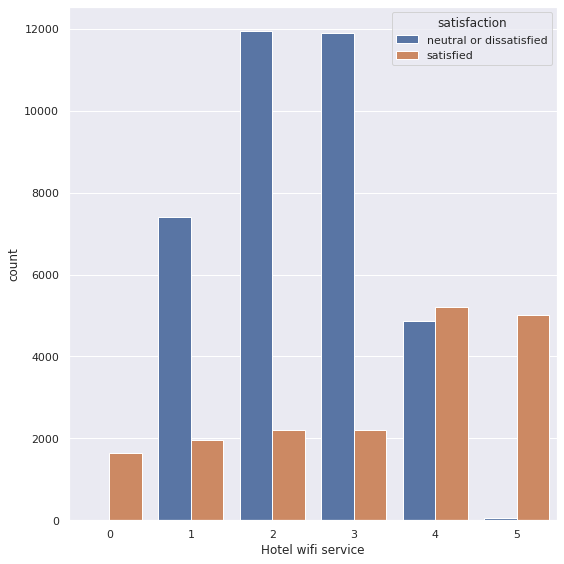

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df_not_mid_age,"Hotel wifi service")

In [ ]:
pivot_satisfaction(df_not_mid_age,"Hotel wifi service")

,Hotel wifi service,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,3,1647,1650,99.818182,0.181818
1,1,7399,1967,9366,21.001495,78.998505
2,2,11942,2202,14144,15.568439,84.431561
3,3,11888,2204,14092,15.640079,84.359921
4,4,4860,5214,10074,51.756998,48.243002
5,5,64,5016,5080,98.740157,1.259843


##Age dan Common Room entertainment

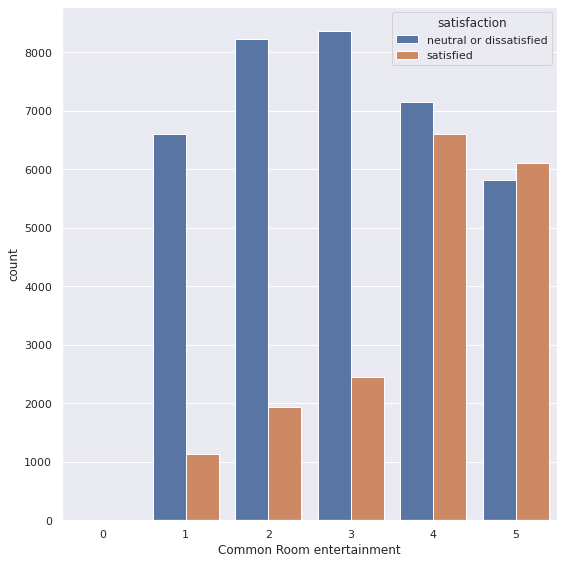

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df_not_mid_age,"Common Room entertainment")

In [ ]:
pivot_satisfaction(df_not_mid_age,"Common Room entertainment")

,Common Room entertainment,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,0,6,0,6,0.000000,100.000000
1,1,6597,1141,7738,14.745412,85.254588
2,2,8226,1945,10171,19.122997,80.877003
3,3,8360,2456,10816,22.707101,77.292899
4,4,7143,6608,13751,48.054687,51.945313
5,5,5824,6100,11924,51.157330,48.842670


## Age dan Stay comfort

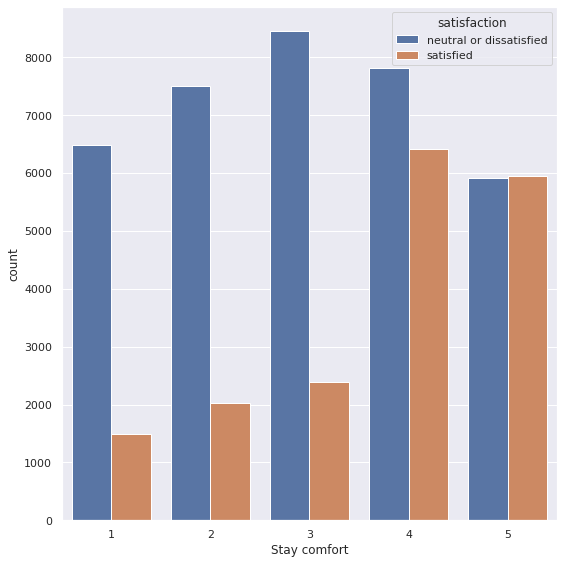

<Figure size 720x360 with 0 Axes>

In [ ]:
df_cat_plot(df_not_mid_age,"Stay comfort")

In [ ]:
pivot_satisfaction(df_not_mid_age,"Stay comfort")

,Stay comfort,neutral or dissatisfied,satisfied,total,satisfaction Rate,dissatisfied Rate
0,1,6478,1485,7963,18.648750,81.351250
1,2,7506,2021,9527,21.213394,78.786606
2,3,8450,2383,10833,21.997600,78.002400
3,4,7817,6415,14232,45.074480,54.925520
4,5,5905,5946,11851,50.172981,49.827019


###Bootstrap

In [ ]:
# bootstrap_means = []
# for i in range(1000):
#     mean_0 = df[df['satisfaction'] == 'neutral or dissatisfied'].sample(1000)['Age'].mean()
#     mean_1 = df[df['satisfaction'] == 'satisfied'].sample(1000)['Age'].mean()
    
#     bootstrap_means.append((mean_0, 'neutral or dissatisfied'))
#     bootstrap_means.append((mean_1, 'satisfied'))

# df_Age_boots = pd.DataFrame(bootstrap_means, columns=['Means', 'satisfaction'])
# sns.histplot(df_Age_boots, hue='satisfaction', x='Means')

###Karakteristik pelanggan Neutral or Dissatisfied
Di sini kita akan melihat karakteristik pelanggan yang Neutral atau Dissatisfied dari data kategorikal dan Age

In [ ]:
total_data = len(df)
total_data

96410

####Gender

In [ ]:
#Distribution of Gender + satisfaction rate 
df_gender = df.groupby(['Gender','satisfaction']).size() / total_data *100
df_gender

Gender  satisfaction           
Female  neutral or dissatisfied    28.193133
        satisfied                  22.408464
Male    neutral or dissatisfied    27.017944
        satisfied                  22.380458
dtype: float64

In [ ]:
df_genders = df_gender.reset_index()
df_genders

,Gender,satisfaction,0
0,Female,neutral or dissatisfied,28.193133
1,Female,satisfied,22.408464
2,Male,neutral or dissatisfied,27.017944
3,Male,satisfied,22.380458


In [ ]:
df_genders = df_genders.rename({'Gender': 'Gender', 'satisfaction': 'satisfaction', 0:'percent'}, axis=1)
df_genders

,Gender,satisfaction,percent
0,Female,neutral or dissatisfied,28.193133
1,Female,satisfied,22.408464
2,Male,neutral or dissatisfied,27.017944
3,Male,satisfied,22.380458


####Purpose of Travel

In [ ]:
#Distribution of Purpose of Travel + satisfaction rate 
df_purpose_of_travel = df.groupby(['purpose_of_travel','satisfaction']).size() / total_data *100
df_purpose_of_travel

purpose_of_travel  satisfaction           
academic           neutral or dissatisfied    14.555544
                   satisfied                  11.675137
aviation           neutral or dissatisfied     7.479515
                   satisfied                   5.882170
business           neutral or dissatisfied    11.222902
                   satisfied                   9.185769
personal           neutral or dissatisfied     5.025412
                   satisfied                   4.123016
tourism            neutral or dissatisfied    16.927705
                   satisfied                  13.922830
dtype: float64

In [ ]:
df_purpose_of_travels = df_purpose_of_travels.rename({0:'percent'}, axis=1)
df_purpose_of_travels

,purpose_of_travel,satisfaction,percent
0,academic,neutral or dissatisfied,14.555544
1,academic,satisfied,11.675137
2,aviation,neutral or dissatisfied,7.479515
3,aviation,satisfied,5.882170
4,business,neutral or dissatisfied,11.222902
5,business,satisfied,9.185769
6,personal,neutral or dissatisfied,5.025412
7,personal,satisfied,4.123016
8,tourism,neutral or dissatisfied,16.927705
9,tourism,satisfied,13.922830


####Type of travel

In [ ]:
#Distribution of Type of Travel  + satisfaction rate 
df_type_of_travel = df.groupby(['Type of Travel','satisfaction']).size() / total_data *100
df_type_of_travel 

Type of Travel   satisfaction           
Group Travel     neutral or dissatisfied    28.574837
                 satisfied                  41.713515
Personal Travel  neutral or dissatisfied    26.636241
                 satisfied                   3.075407
dtype: float64

In [ ]:
df_type_of_travels = df_type_of_travel.reset_index()
df_type_of_travels = df_type_of_travels.rename({0:'percent'}, axis=1)
df_type_of_travels

,Type of Travel,satisfaction,percent
0,Group Travel,neutral or dissatisfied,28.574837
1,Group Travel,satisfied,41.713515
2,Personal Travel,neutral or dissatisfied,26.636241
3,Personal Travel,satisfied,3.075407


####Type Of booking

In [ ]:
#Distribution of Type of Travel  + satisfaction rate 
df_type_of_booking = df.groupby(['Type Of Booking','satisfaction']).size() / total_data *100
df_type_of_booking

Type Of Booking    satisfaction           
Group bookings     neutral or dissatisfied    15.750441
                   satisfied                  35.763925
Individual/Couple  neutral or dissatisfied    39.460637
                   satisfied                   9.024997
dtype: float64

In [ ]:
df_type_of_bookings =df_type_of_booking.reset_index()
df_type_of_bookings = df_type_of_bookings.rename({0:'percent'}, axis=1)
df_type_of_bookings

,Type Of Booking,satisfaction,percent
0,Group bookings,neutral or dissatisfied,15.750441
1,Group bookings,satisfied,35.763925
2,Individual/Couple,neutral or dissatisfied,39.460637
3,Individual/Couple,satisfied,9.024997


####Age

In [ ]:
#Distribution of Age group + satisfaction rate 
df_age = df.groupby(['age_group','satisfaction']).size() / total_data *100
df_age

age_group  satisfaction           
Middle     neutral or dissatisfied    17.708744
           satisfied                  25.859351
Old        neutral or dissatisfied     5.790893
           satisfied                   1.572451
Young      neutral or dissatisfied    31.711441
           satisfied                  17.357121
dtype: float64

In [ ]:
df_ages = df_age.reset_index()
df_ages  = df_ages.rename({0:'percent'}, axis=1)
df_ages 

,age_group,satisfaction,percent
0,Middle,neutral or dissatisfied,17.708744
1,Middle,satisfied,25.859351
2,Old,neutral or dissatisfied,5.790893
3,Old,satisfied,1.572451
4,Young,neutral or dissatisfied,31.711441
5,Young,satisfied,17.357121


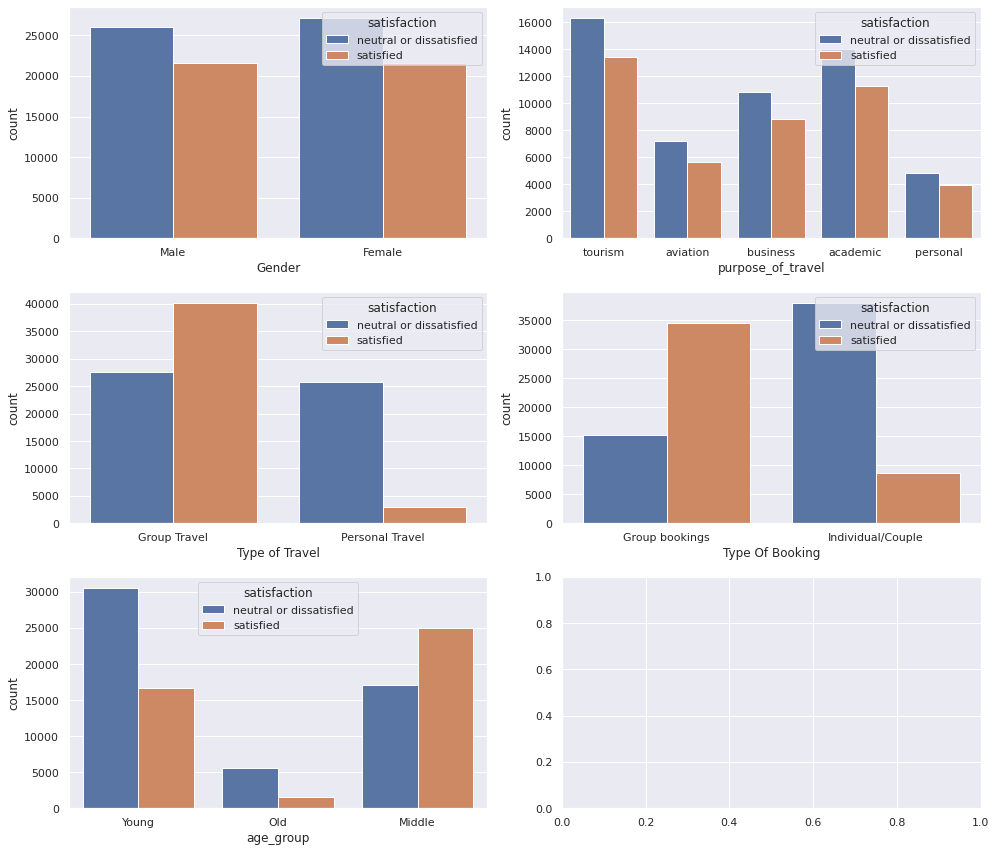

In [ ]:
sns.set(style='darkgrid')
fig, ax = plt.subplots(3,2, figsize=(14, 12))
sns.countplot(data=df, x='Gender', hue='satisfaction', ax=ax[0][0])
sns.countplot(data=df, x='purpose_of_travel', hue='satisfaction', ax=ax[0][1])
sns.countplot(data=df, x='Type of Travel', hue='satisfaction', ax=ax[1][0])
sns.countplot(data=df, x='Type Of Booking', hue='satisfaction', ax=ax[1][1])
sns.countplot(data=df, x='age_group', hue='satisfaction', ax=ax[2][0])
plt.tight_layout()
plt.show()

Dari visualisasi di atas kita bisa menyimpulkan karakteristik pelanggan yang Neutral or Dissatisfied yaitu :  
1.	Gender: “Female”.
2.	Purpose of travel: “tourism”.
3.	Type of travel: “Group Travel”.
4.	Type of booking: “Individual/Couple”.
5.	Age: “Young”, yaitu umur <40 tahun. 

In [ ]:
#Function to create graph from group by code
def grouping(df,column):

  x,y = column, 'satisfaction'

  g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df)
  g.ax.set_ylim(0,50)

  for p in g.ax.patches:
      txt = str(p.get_height().round(2)) + '%'
      txt_x = p.get_x() 
      txt_y = p.get_height()
      g.ax.text(txt_x,txt_y,txt)

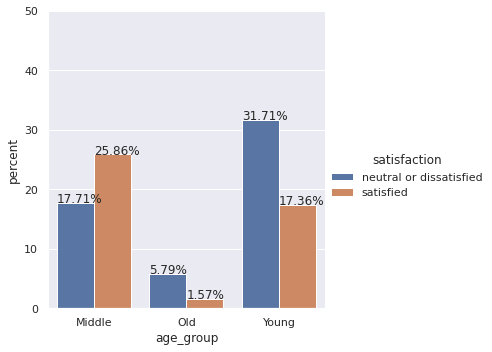

In [ ]:
grouping(df_ages,'age_group')

#Preprocessing Data

##Encode Data

Dikarenakan ada beberapa data kategorikal maka sebelum ke pembuatan model, data tersebut harus diubah menjadi data numerikal terlebih dahulu dengan cara melakukan encoding data

###One Hot Encoding cara pertama

Pertama kita lakukan One Hot Encoding kepada data nominal yaitu pada kasus ini Gender,purpose_of_travel,Type of Travel,Type Of Booking

In [ ]:
df = pd.read_csv('Dataset6_Hotel_Satisfaction.csv')
df=df.loc[(df['Type Of Booking'] == 'Group bookings') | (df['Type Of Booking'] == 'Individual/Couple')]

In [ ]:
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
5,111157,Female,26,business,Personal Travel,Individual/Couple,3,4,2,1,1,1,1,4,4,1,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


In [ ]:
df_purpose_of_travel = pd.get_dummies(df['purpose_of_travel'])
df_gender = pd.get_dummies(df['Gender'])
df_type_of_travel = pd.get_dummies(df['Type of Travel'])
df_type_of_booking = pd.get_dummies(df['Type Of Booking'])

In [ ]:
df = pd.concat([df,df_purpose_of_travel,df_gender,df_type_of_travel,df_type_of_booking], axis=1)

###One Hot Encoding cara kedua

Note: Gunakan salah satu saja

In [ ]:
# pd.get_dummies(df, drop_first=True).shape

In [ ]:
# df.purpose_of_travel.value_counts().sort_values(ascending=False).head()

In [ ]:
# #Make a list of categories of the variable
# one_hot = [x for x in df['purpose_of_travel'].value_counts().sort_values(ascending=False).head().index]
# one_hot

In [ ]:
# #get whole set of dummy variable for all categorical variables

# def one_hot_encode (df_,variable,top_x_labels):
#   #function to create the dummy variables for the most frequent label
#   #we can vary the number of most frequent label that we encode
#   for label in top_x_labels:
#     df_[variable + '_' + label] = np.where(df[variable]==label,1,0)

In [ ]:
# #Make a list of categories of the variable Gender
# one_hot = [x for x in df['purpose_of_travel'].value_counts().sort_values(ascending=False).head().index]
# #Encode purpose_of_travel into most frequent categories
# one_hot_encode(df,'purpose_of_travel',one_hot)
# df.head()

Dengan Step yang sama maka lakukan kepada 3 variable lainnya

In [ ]:
# #Make a list of categories of the variable Gender
# one_hot = [x for x in df['Gender'].value_counts().sort_values(ascending=False).head().index]
# #Encode purpose_of_travel into most frequent categories
# one_hot_encode(df,'Gender',one_hot)
# df.head()

In [ ]:
# #Make a list of categories of the variable Type of Travel
# one_hot  = [x for x in df['Type of Travel'].value_counts().sort_values(ascending=False).head().index]
# #Encode purpose_of_travel into most frequent categories
# one_hot_encode(df,'Type of Travel',one_hot)
# df.head()

In [ ]:
# #Make a list of categories of the variable Type of Booking
# one_hot = [x for x in df['Type Of Booking'].value_counts().sort_values(ascending=False).head().index]
# #Encode purpose_of_travel into most frequent categories
# one_hot_encode(df,'Type Of Booking',one_hot)
# df.head(10)

In [ ]:
# #Read DataFrame again
# df.head()

###Label Encoder

Selanjutnya kita akan membuat Label Encoder dari data oridnal yaitu satisfcation dangan bantuan library sklearn

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['satisfaction'] = LE.fit_transform(df['satisfaction'])

In [ ]:
#Read satisfaction columns
df['satisfaction']

1         0
2         1
3         0
4         1
5         0
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 96410, dtype: int64

Terlihat bahwa kolom satisfaction sudah berubah menjadi 0 dan 1 dimana 0 menyatakan neutral or dissatisfied sedangkan 1 menyatakan satisfied

Kemudian kita akan melakukan drop kepada 5 kolom induk hasil encoding data dan juga kolom id yang tidak akan digunakan pada proses selanjutnya

In [ ]:
df_new = df.drop(['id','Gender','purpose_of_travel','Type of Travel','Type Of Booking'], axis=1)

In [ ]:
df_new

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
1,25,3,2,3,3,1,1,1,1,4,...,0,0,0,1,0,1,1,0,1,0
2,26,2,2,2,2,5,5,5,4,4,...,0,0,0,1,1,0,1,0,1,0
3,25,2,5,5,5,2,2,2,1,4,...,0,0,0,1,1,0,1,0,1,0
4,61,3,3,3,3,4,5,3,3,3,...,1,0,0,0,0,1,1,0,1,0
5,26,3,4,2,1,1,1,1,4,4,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,2,1,2,3,2,2,2,2,3,...,0,1,0,0,1,0,1,0,0,1
103900,49,4,4,4,4,2,5,5,5,5,...,0,0,0,1,0,1,1,0,1,0
103901,30,1,1,1,3,4,5,4,5,5,...,0,0,0,1,0,1,1,0,1,0
103902,22,1,1,1,5,1,1,1,5,4,...,0,1,0,0,1,0,1,0,0,1


##Standardization

Kita melakukan scaling karena kolom age memiliki nilai dengan rang 7-85 berbeda jauh dengan kolom scoring dengan range 0-5

In [ ]:
from sklearn import preprocessing 
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df_new)
scaled

array([[0.23076923, 0.6       , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.4       , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29487179, 0.2       , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.2       , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.25641026, 0.2       , 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
df_new.columns

Index(['Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction', 'academic', 'aviation',
       'business', 'personal', 'tourism', 'Female', 'Male', 'Group Travel',
       'Personal Travel', 'Group bookings', 'Individual/Couple'],
      dtype='object')

In [ ]:
scaled = pd.DataFrame(scaled,
                      columns=[
                          'Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction', 'academic', 'aviation',
       'business', 'personal', 'tourism', 'Female', 'Male', 'Group Travel',
       'Personal Travel', 'Group bookings', 'Individual/Couple'
                      ])

In [ ]:
scaled

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
0,0.230769,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.243590,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.230769,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.692308,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.243590,0.6,0.8,0.4,0.2,0.2,0.2,0.2,0.8,0.8,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96405,0.205128,0.4,0.2,0.4,0.6,0.4,0.4,0.4,0.4,0.6,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
96406,0.538462,0.8,0.8,0.8,0.8,0.4,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
96407,0.294872,0.2,0.2,0.2,0.6,0.8,1.0,0.8,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
96408,0.192308,0.2,0.2,0.2,1.0,0.2,0.2,0.2,1.0,0.8,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


##Correlation Matrix

Selanjutnya kita akan membuat correlation matrix hasil encoding data

In [ ]:
scaled.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
0,0.230769,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.243590,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.230769,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.692308,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.243590,0.6,0.8,0.4,0.2,0.2,0.2,0.2,0.8,0.8,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
scaled.corr()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
Age,1.000000,0.014630,0.040551,0.023231,-0.000651,0.025761,0.168859,0.083173,0.038718,-0.047118,...,-0.000054,0.000123,0.000832,0.003448,-0.008096,0.008096,0.049929,-0.049929,0.147027,-0.147027
Hotel wifi service,0.014630,1.000000,0.365178,0.730728,0.359327,0.119600,0.111816,0.195785,0.045529,0.116771,...,-0.002370,-0.000381,0.000823,0.000548,-0.008581,0.008581,0.098992,-0.098992,0.037645,-0.037645
Departure/Arrival convenience,0.040551,0.365178,1.000000,0.442387,0.449327,0.002535,0.009079,-0.005820,0.088146,0.067739,...,-0.002221,-0.000033,-0.000825,0.000119,-0.007351,0.007351,-0.256175,0.256175,-0.095914,0.095914
Ease of Online booking,0.023231,0.730728,0.442387,1.000000,0.461350,0.031029,0.029338,0.048122,0.012914,0.038271,...,0.002276,-0.006705,0.001466,-0.001121,-0.005736,0.005736,0.131372,-0.131372,0.110146,-0.110146
Hotel location,-0.000651,0.359327,0.449327,0.461350,1.000000,-0.002268,0.002647,0.002813,-0.034831,0.001832,...,-0.001537,-0.005096,0.000886,-0.001017,-0.001500,0.001500,0.029753,-0.029753,0.004285,-0.004285
Food and drink,0.025761,0.119600,0.002535,0.031029,-0.002268,1.000000,0.567471,0.611717,0.087574,0.038026,...,-0.005339,0.005087,-0.002827,-0.000672,-0.004961,0.004961,0.065658,-0.065658,0.089210,-0.089210
Stay comfort,0.168859,0.111816,0.009079,0.029338,0.002647,0.567471,1.000000,0.608201,0.194358,0.075541,...,-0.003969,0.005662,-0.001251,-0.004046,0.025163,-0.025163,0.131945,-0.131945,0.236299,-0.236299
Common Room entertainment,0.083173,0.195785,-0.005820,0.048122,0.002813,0.611717,0.608201,1.000000,0.122980,0.418656,...,-0.004872,0.006944,0.001506,-0.005405,-0.005468,0.005468,0.153368,-0.153368,0.201869,-0.201869
Checkin/Checkout service,0.038718,0.045529,0.088146,0.012914,-0.034831,0.087574,0.194358,0.122980,1.000000,0.242443,...,-0.001607,0.001569,0.001068,-0.004020,-0.011351,0.011351,-0.005545,0.005545,0.157760,-0.157760
Other service,-0.047118,0.116771,0.067739,0.038271,0.001832,0.038026,0.075541,0.418656,0.242443,1.000000,...,-0.004090,0.003985,0.006218,-0.005933,-0.037045,0.037045,0.034321,-0.034321,0.162239,-0.162239


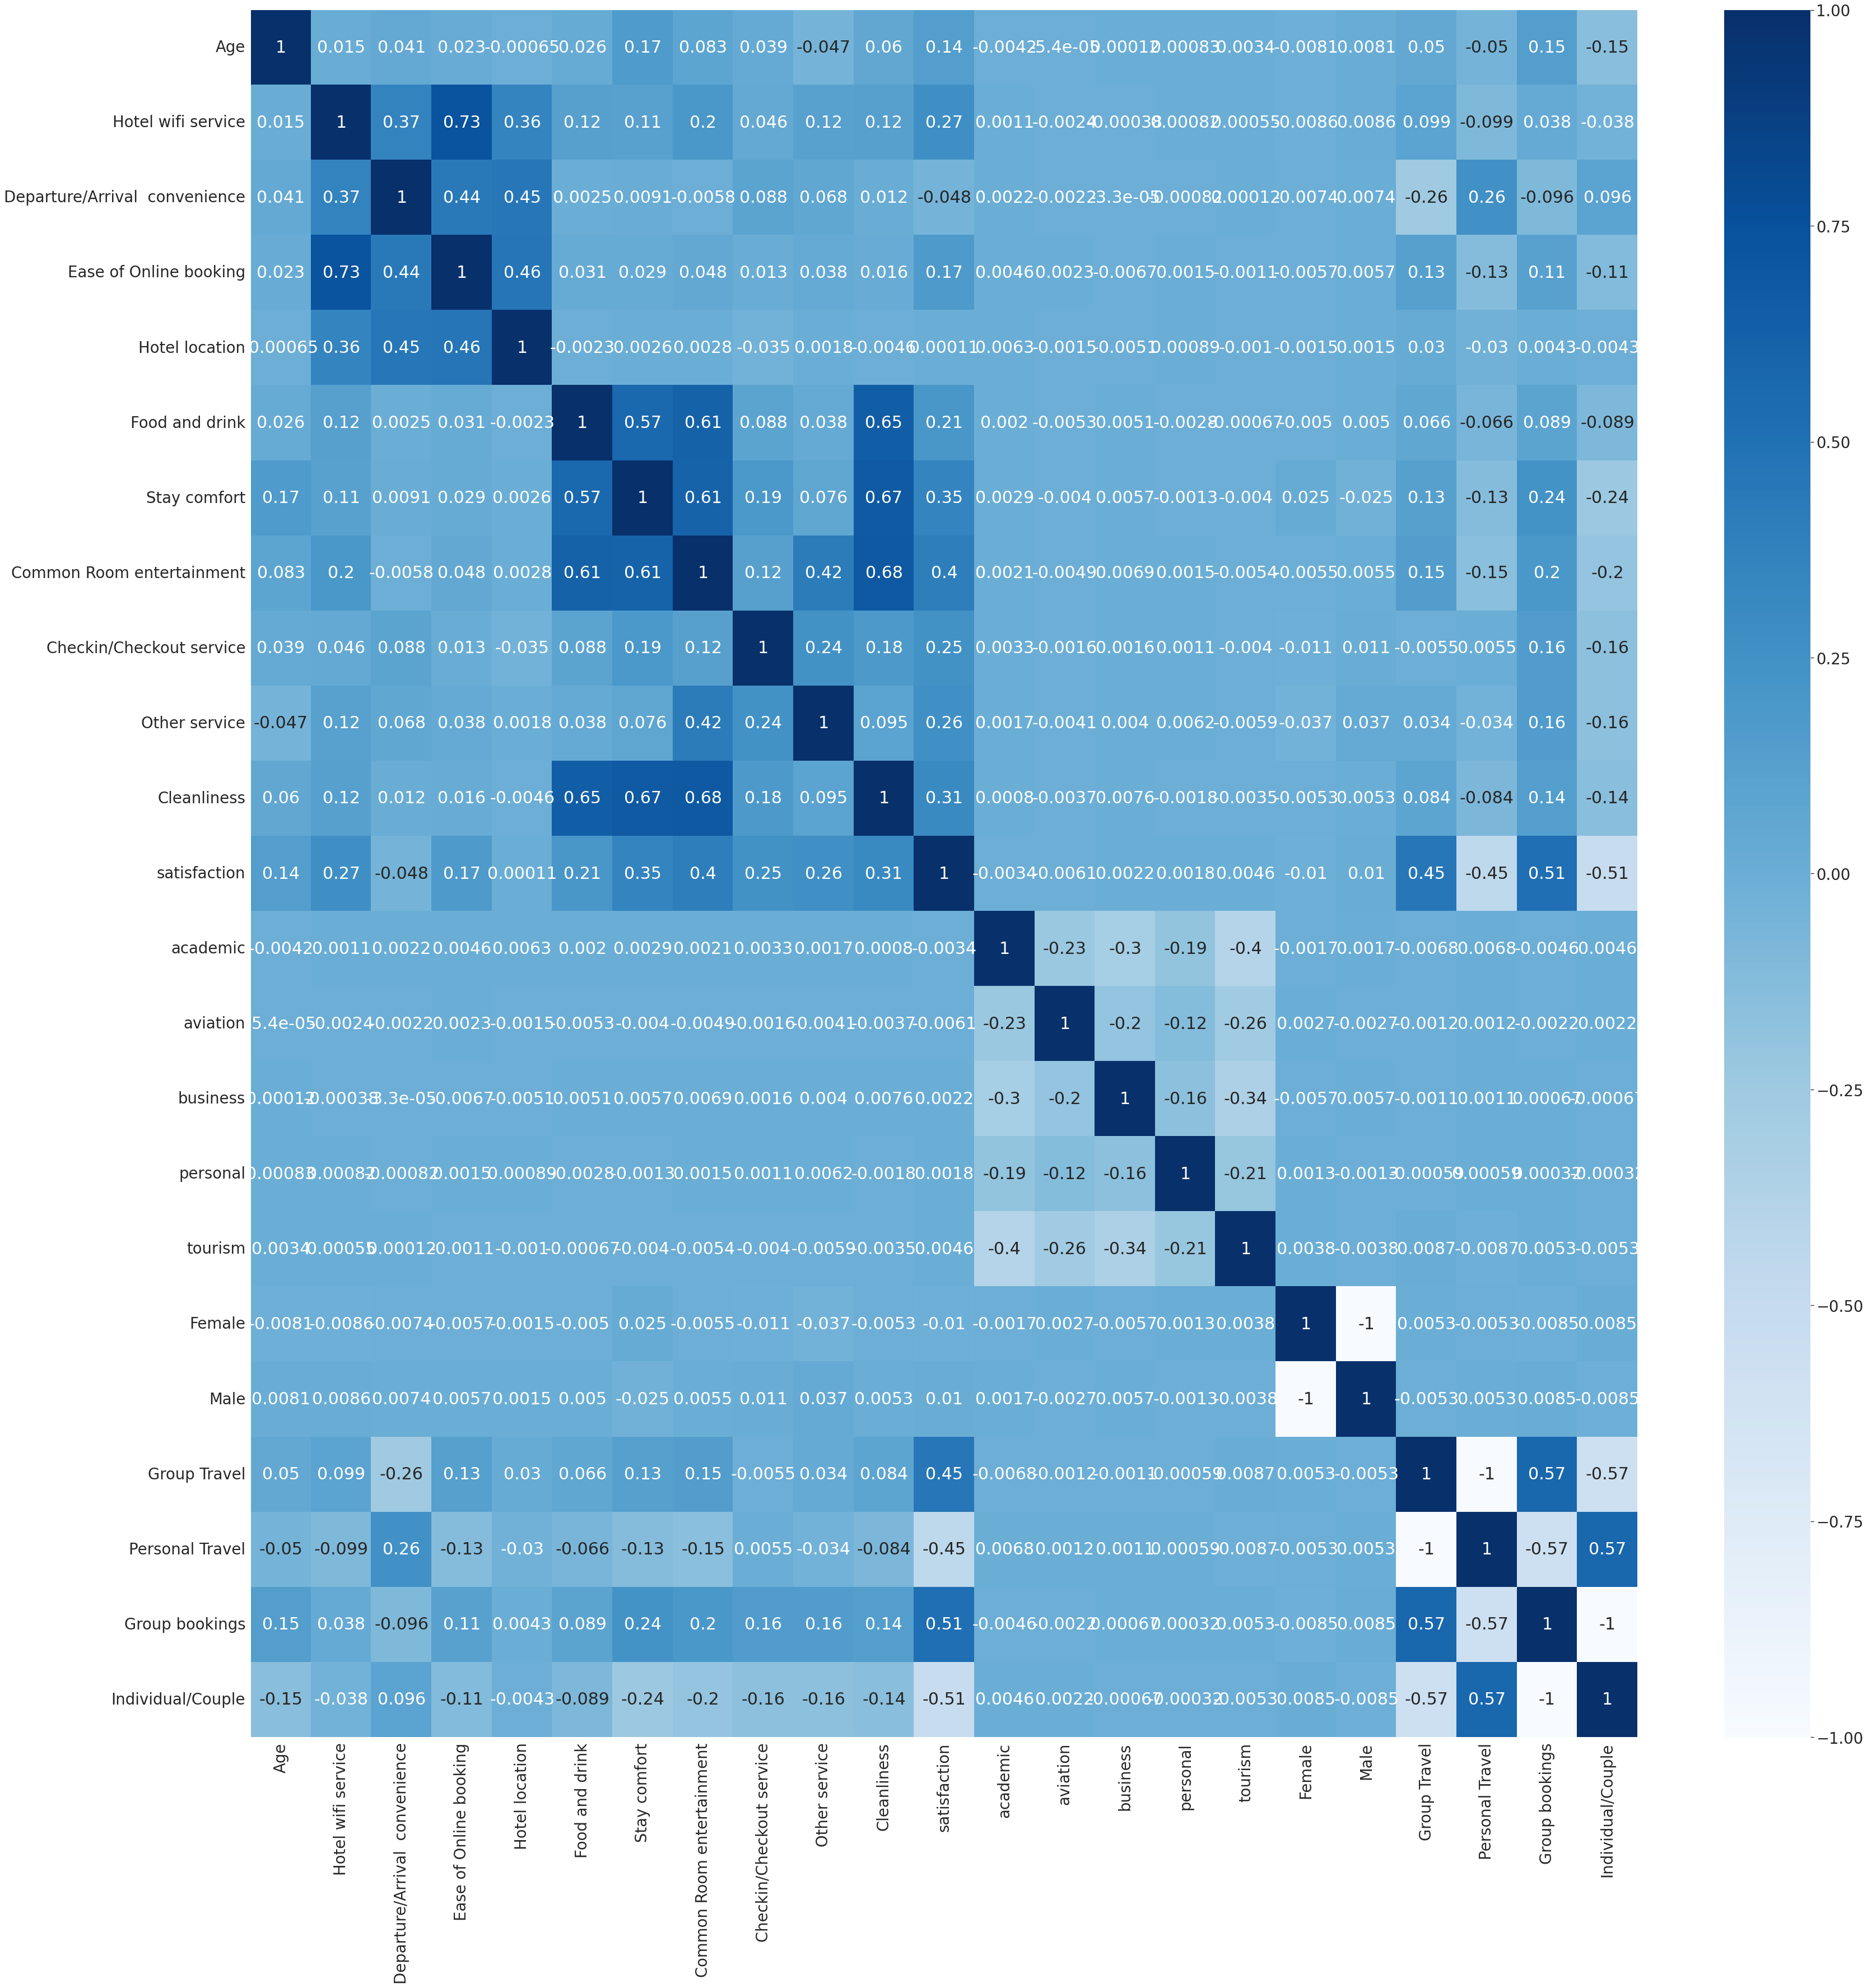

In [ ]:
# Create correlation matrix
corr_matrix = scaled.corr()

plt.figure(figsize=(50,50))
sns.set(font_scale=2.5)
sns.heatmap(corr_matrix, annot=True, cmap='Blues',fmt='.2g' )

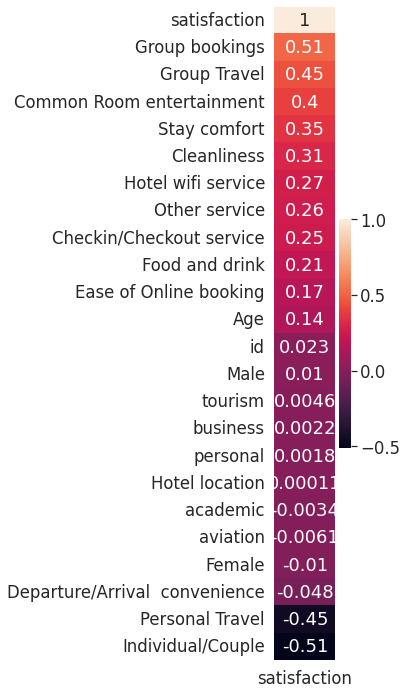

In [ ]:
plt.figure(figsize=(6,10))
sns.heatmap(corr_matrix[['satisfaction']].sort_values(by=['satisfaction'],ascending=False,),annot=True)

In [ ]:
df_new.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
1,25,3,2,3,3,1,1,1,1,4,...,0,0,0,1,0,1,1,0,1,0
2,26,2,2,2,2,5,5,5,4,4,...,0,0,0,1,1,0,1,0,1,0
3,25,2,5,5,5,2,2,2,1,4,...,0,0,0,1,1,0,1,0,1,0
4,61,3,3,3,3,4,5,3,3,3,...,1,0,0,0,0,1,1,0,1,0
5,26,3,4,2,1,1,1,1,4,4,...,0,1,0,0,1,0,0,1,0,1


In [ ]:
df_new.corr()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
Age,1.000000,0.014630,0.040551,0.023231,-0.000651,0.025761,0.168859,0.083173,0.038718,-0.047118,...,-0.000054,0.000123,0.000832,0.003448,-0.008096,0.008096,0.049929,-0.049929,0.147027,-0.147027
Hotel wifi service,0.014630,1.000000,0.365178,0.730728,0.359327,0.119600,0.111816,0.195785,0.045529,0.116771,...,-0.002370,-0.000381,0.000823,0.000548,-0.008581,0.008581,0.098992,-0.098992,0.037645,-0.037645
Departure/Arrival convenience,0.040551,0.365178,1.000000,0.442387,0.449327,0.002535,0.009079,-0.005820,0.088146,0.067739,...,-0.002221,-0.000033,-0.000825,0.000119,-0.007351,0.007351,-0.256175,0.256175,-0.095914,0.095914
Ease of Online booking,0.023231,0.730728,0.442387,1.000000,0.461350,0.031029,0.029338,0.048122,0.012914,0.038271,...,0.002276,-0.006705,0.001466,-0.001121,-0.005736,0.005736,0.131372,-0.131372,0.110146,-0.110146
Hotel location,-0.000651,0.359327,0.449327,0.461350,1.000000,-0.002268,0.002647,0.002813,-0.034831,0.001832,...,-0.001537,-0.005096,0.000886,-0.001017,-0.001500,0.001500,0.029753,-0.029753,0.004285,-0.004285
Food and drink,0.025761,0.119600,0.002535,0.031029,-0.002268,1.000000,0.567471,0.611717,0.087574,0.038026,...,-0.005339,0.005087,-0.002827,-0.000672,-0.004961,0.004961,0.065658,-0.065658,0.089210,-0.089210
Stay comfort,0.168859,0.111816,0.009079,0.029338,0.002647,0.567471,1.000000,0.608201,0.194358,0.075541,...,-0.003969,0.005662,-0.001251,-0.004046,0.025163,-0.025163,0.131945,-0.131945,0.236299,-0.236299
Common Room entertainment,0.083173,0.195785,-0.005820,0.048122,0.002813,0.611717,0.608201,1.000000,0.122980,0.418656,...,-0.004872,0.006944,0.001506,-0.005405,-0.005468,0.005468,0.153368,-0.153368,0.201869,-0.201869
Checkin/Checkout service,0.038718,0.045529,0.088146,0.012914,-0.034831,0.087574,0.194358,0.122980,1.000000,0.242443,...,-0.001607,0.001569,0.001068,-0.004020,-0.011351,0.011351,-0.005545,0.005545,0.157760,-0.157760
Other service,-0.047118,0.116771,0.067739,0.038271,0.001832,0.038026,0.075541,0.418656,0.242443,1.000000,...,-0.004090,0.003985,0.006218,-0.005933,-0.037045,0.037045,0.034321,-0.034321,0.162239,-0.162239


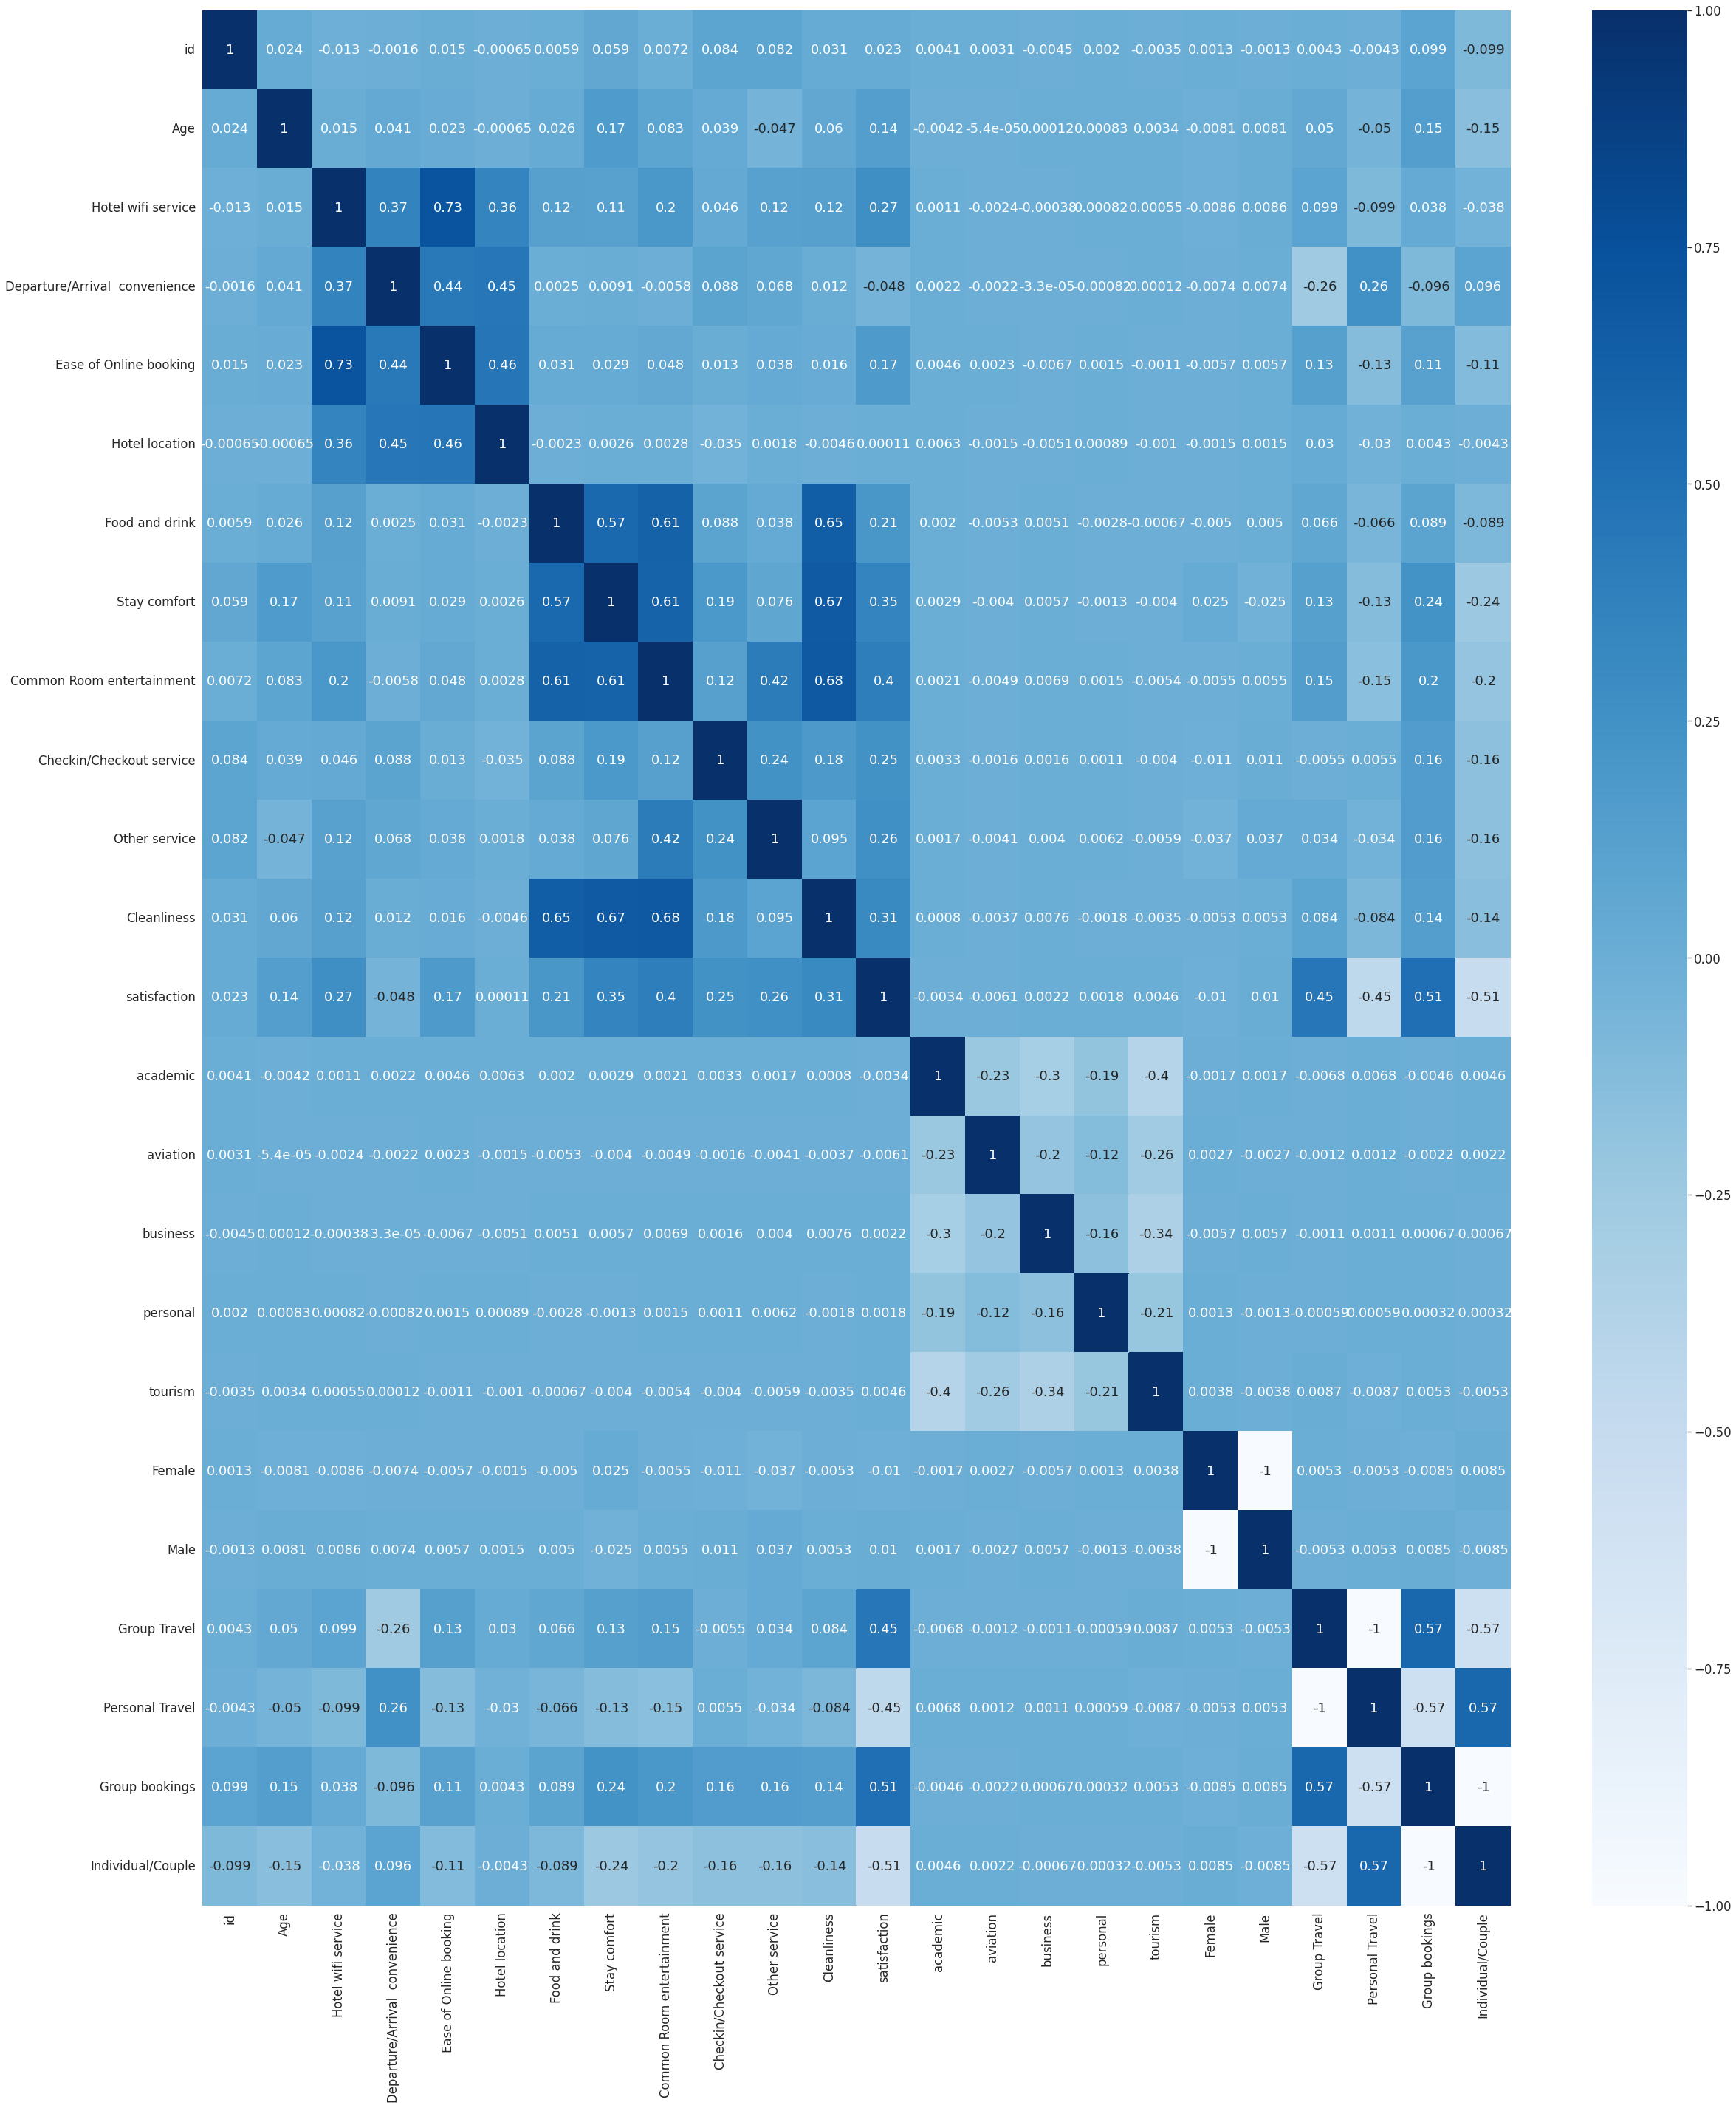

In [ ]:
# Create correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(35,40))
sns.set(font_scale=1.5)
sns.heatmap(corr_matrix, annot=True, cmap='Blues',fmt='.2g' )

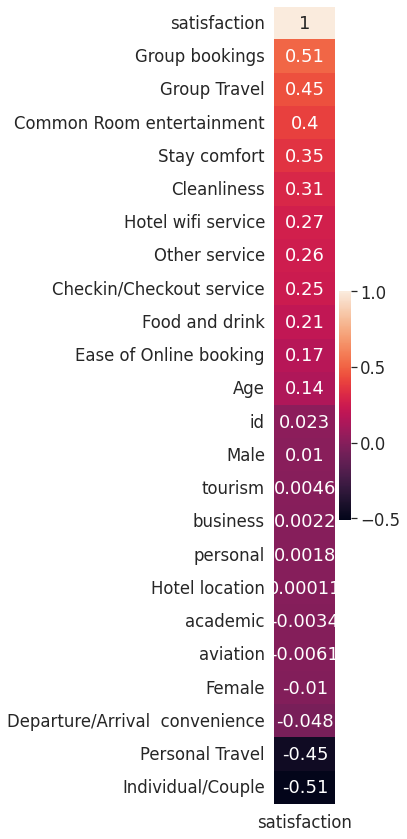

In [ ]:
plt.figure(figsize=(6,12))
sns.heatmap(corr_matrix[['satisfaction']].sort_values(by=['satisfaction'],ascending=False,),annot=True)

#Modeling

Note: Jalankan salah satu versi saja

##Versi 1

Berikut adalah library untuk melakukan proses Machine Learning

In [ ]:
# Disable Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix

# Train-Test Split
from sklearn.model_selection import train_test_split

# Cross Validation, ini untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import RepeatedStratifiedKFold

# Grid Search, Untuk mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, learning_curve

In [ ]:
# Memisahkan mana X dan mana y
y= scaled['satisfaction']
X= scaled.drop(['satisfaction'],1)

In [ ]:
X.shape,y.shape

((96410, 22), (96410,))

In [ ]:
X.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,aviation,business,personal,tourism,Female,Male,Group Travel,Personal Travel,Group bookings,Individual/Couple
0,0.230769,0.6,0.4,0.6,0.6,0.2,0.2,0.2,0.2,0.8,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.243590,0.4,0.4,0.4,0.4,1.0,1.0,1.0,0.8,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.230769,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.2,0.8,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.692308,0.6,0.6,0.6,0.6,0.8,1.0,0.6,0.6,0.6,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.243590,0.6,0.8,0.4,0.2,0.2,0.2,0.2,0.8,0.8,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [ ]:
y

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
96405    0.0
96406    1.0
96407    0.0
96408    0.0
96409    0.0
Name: satisfaction, Length: 96410, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=0)

In [ ]:
print('Ukuran data X train adalah :' , X_train_scaled.shape)
print('Ukuran data X test adalah :' , X_test_scaled.shape)
print('Ukuran data y train adalah :' , y_train.shape)
print('Ukuran data y test adalah :' , y_test.shape)

Ukuran data X train adalah : (77128, 22)
Ukuran data X test adalah : (19282, 22)
Ukuran data y train adalah : (77128,)
Ukuran data y test adalah : (19282,)


In [ ]:
# Modelling Algorithms

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

## Collect all model in one list
all_model = [DecisionTreeClassifier,
            LogisticRegression,
             KNeighborsClassifier,
             GaussianNB,
            SVC,
            LinearSVC,
            RandomForestClassifier,
            GradientBoostingClassifier,
            ExtraTreesClassifier,
             XGBClassifier]

model_name = ['DecisionTreeClassifier',
            'LogisticRegression',
             'KNeighborsClassifier',
             'GaussianNB',
            'SVC',
            'LinearSVC',
            'RandomForestClassifier',
            'GradientBoostingClassifier',
            'ExtraTreesClassifier',
             'XGBClassifier']
## loop for all model

datatr = []
datasc = []
Recall =[]
Precision =[]
auc =[]

for idx, model_type in enumerate(all_model):
    num = 1
    AccTrain = []
    AccTest = []
    RecallTemp = []
    PrecisionTemp = []
    AucTemp = []
    nfold = 1
    for train_index,test_index in kf.split(X,y): 

        print("----------BEFORE------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        model = model_type()
        model.fit(X_train_scaled,y_train)
        y_pred=model.predict(X_test_scaled)
        
        AccTrain.append(model.score(X_train_scaled , y_train))
        AccTest.append(model.score(X_test_scaled , y_test))
        RecallTemp.append(recall_score(y_test,y_pred))
        PrecisionTemp.append(precision_score(y_test,y_pred))
        AucTemp.append(roc_auc_score(y_test, y_pred))
        
        print("----------AFTER------------")
        print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
        print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
        print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
        print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
        print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
        print("---------------------------")
        
        nfold += 1
    
    print("----------FINAL------------")
    print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
    print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
    print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
    print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
    print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
    print("---------------------------")
    datatr.append(np.mean(AccTrain))
    datasc.append(np.mean(AccTest))
    Recall.append(np.mean(RecallTemp))
    Precision.append(np.mean(PrecisionTemp))
    auc.append(np.mean(AucTemp))



----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.9264599107976351], 1 of KFold 5
DecisionTreeClassifier Recall: [0.9173228346456693], 1 of KFold 5
DecisionTreeClassifier Precission: [0.918386274055182], 1 of KFold 5
DecisionTreeClassifier AUC: [0.925597355703447], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.9264599107976351], 2 of KFold 5
DecisionTreeClassifier Recall: [0.9173228346456693], 2 of KFold 5
DecisionTreeClassifier Precission: [0.918386274055182], 2 of KFold 5
Decision

In [ ]:
# Compare model each other
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = datatr
data_hasil['Accuracy test'] = datasc
data_hasil['Precision'] = Precision
data_hasil['Recall']= Recall
data_hasil['AUC']=auc
data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
6,RandomForestClassifier,0.999334,0.946821,0.948837,0.931498,0.945375,0.052513
8,ExtraTreesClassifier,0.999347,0.941396,0.943076,0.924990,0.939848,0.057950
9,XGBClassifier,0.926670,0.926263,0.920600,0.914221,0.925126,0.000407
7,GradientBoostingClassifier,0.926802,0.926252,0.918412,0.916792,0.925360,0.000550
0,DecisionTreeClassifier,0.999347,0.925972,0.916693,0.918158,0.925235,0.073374
4,SVC,0.925236,0.923141,0.906657,0.923485,0.923173,0.002095
2,KNeighborsClassifier,0.931994,0.904937,0.910727,0.873370,0.901958,0.027056
1,LogisticRegression,0.841093,0.841054,0.820285,0.826127,0.839645,0.000039
5,LinearSVC,0.839858,0.839913,0.814882,0.831477,0.839117,0.000054
3,GaussianNB,0.821061,0.821118,0.765157,0.866608,0.825412,0.000057


Kita memilih model XGBClassifier karena hasil dari test dan training tidak berbeda jauh

In [ ]:
# kfold = StratifiedKFold(n_splits=10)

In [ ]:
#Cross validation
# # Modeling step to test differents algorithms 
# random_state = 2
# classifiers = []
# classifiers.append(DecisionTreeClassifier(random_state=random_state))
# classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
# classifiers.append(LogisticRegression(random_state = random_state))
# classifiers.append(KNeighborsClassifier())
# classifiers.append(GaussianNB())
# classifiers.append(SVC(random_state=random_state))
# classifiers.append(LinearSVC(random_state=random_state))
# classifiers.append(RandomForestClassifier(random_state=random_state))
# classifiers.append(GradientBoostingClassifier(random_state=random_state))
# classifiers.append(ExtraTreesClassifier(random_state=random_state))
# classifiers.append(XGBClassifier(random_state=random_state))

# cv_results = []
# for classifier in classifiers :
#     cv_results.append(cross_val_score(classifier, X_train_scaled, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

# cv_means = []
# cv_std = []
# for cv_result in cv_results:
#     cv_means.append(cv_result.mean())
#     cv_std.append(cv_result.std())

# cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree", "AdaBoost", "LogisticRegression","KNeighbors", "GaussianNB", "SVC", "LinearSVC", 
# "RandomForest","GradientBoosting", "ExtraTrees", "XGBoost"]})

# g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
# g.set_xlabel("Mean Accuracy")
# g = g.set_title("Cross validation scores")

##Versi 2

In [ ]:
# # Memisahkan mana X dan mana y
# y= df_new['satisfaction']
# X= df_new.drop(['satisfaction'],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# X.head()

,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,...,purpose_of_travel_academic,purpose_of_travel_business,purpose_of_travel_aviation,purpose_of_travel_personal,Gender_Female,Gender_Male,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple
1,25,3,2,3,3,1,1,1,1,4,...,0,0,0,0,0,1,1,0,1,0
2,26,2,2,2,2,5,5,5,4,4,...,0,0,0,0,1,0,1,0,1,0
3,25,2,5,5,5,2,2,2,1,4,...,0,0,0,0,1,0,1,0,1,0
4,61,3,3,3,3,4,5,3,3,3,...,0,0,1,0,0,1,1,0,1,0
5,26,3,4,2,1,1,1,1,4,4,...,0,1,0,0,1,0,0,1,0,1


In [ ]:
# y

1         0
2         1
3         0
4         1
5         0
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 96410, dtype: int64

In [ ]:
# from sklearn import preprocessing 
# scaler = preprocessing.MinMaxScaler()
 # X_scaled = scaler.fit_transform(X)
# X_scaled

array([[0.23076923, 0.6       , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.24358974, 0.4       , 0.4       , ..., 0.        , 1.        ,
        0.        ],
       [0.23076923, 0.4       , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.29487179, 0.2       , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.19230769, 0.2       , 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.25641026, 0.2       , 0.6       , ..., 0.        , 1.        ,
        0.        ]])

In [ ]:
# # Disable Warnings
# import warnings
# warnings.filterwarnings("ignore")

# # Machine Learning Model
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from lightgbm import LGBMClassifier
# from xgboost import XGBClassifier

# # Evaluation
# from sklearn import metrics
# from sklearn.metrics import classification_report, roc_auc_score, roc_curve
# from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
# from sklearn.metrics import confusion_matrix

# # Train-Test Split
# from sklearn.model_selection import train_test_split

# # Cross Validation, ini untuk menangani data yang tidak balance
# from sklearn.model_selection import StratifiedKFold 
# from sklearn.model_selection import RepeatedStratifiedKFold

# # Grid Search, Untuk mencari hyperparameter terbaik
# from sklearn.model_selection import GridSearchCV

In [ ]:
# from sklearn.model_selection import train_test_split
# # X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=0)
# X_train_scaled,X_test_scaled,y_train,y_test = train_test_split(X_scaled,y,test_size=.2,random_state=0)

In [ ]:
# X_test_scaled

array([[0.48717949, 0.4       , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.25641026, 0.6       , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.51282051, 0.2       , 0.8       , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.44871795, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.71794872, 0.8       , 0.8       , ..., 0.        , 1.        ,
        0.        ],
       [0.69230769, 0.6       , 0.8       , ..., 1.        , 0.        ,
        1.        ]])

In [ ]:
# # Modelling Algorithms

# kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=0)

# ## Collect all model in one list
# all_model = [DecisionTreeClassifier,
#             LogisticRegression,
#              KNeighborsClassifier,
#              GaussianNB,
#             SVC,
#             LinearSVC,
#             RandomForestClassifier,
#             GradientBoostingClassifier,
#             ExtraTreesClassifier,
#              XGBClassifier]

# model_name = ['DecisionTreeClassifier',
#             'LogisticRegression',
#              'KNeighborsClassifier',
#              'GaussianNB',
#             'SVC',
#             'LinearSVC',
#             'RandomForestClassifier',
#             'GradientBoostingClassifier',
#             'ExtraTreesClassifier',
#              'XGBClassifier']
# ## loop for all model

# datatr = []
# datasc = []
# Recall =[]
# Precision =[]
# auc =[]

# for idx, model_type in enumerate(all_model):
#     num = 1
#     AccTrain = []
#     AccTest = []
#     RecallTemp = []
#     PrecisionTemp = []
#     AucTemp = []
#     nfold = 1
#     for train_index,test_index in kf.split(X,y): 

#         print("----------BEFORE------------")
#         print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
#         print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
#         print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
#         print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
#         print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
#         print("---------------------------")
        
#         X_train_scaled, X_test_scaled = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
#         model = model_type()
#         model.fit(X_train_scaled,y_train)
#         y_pred=model.predict(X_test_scaled)
        
#         AccTrain.append(model.score(X_train_scaled , y_train))
#         AccTest.append(model.score(X_test_scaled , y_test))
#         RecallTemp.append(recall_score(y_test,y_pred))
#         PrecisionTemp.append(precision_score(y_test,y_pred))
#         AucTemp.append(roc_auc_score(y_test, y_pred))
        
#         print("----------AFTER------------")
#         print("{} Acc Train: {}, {} of KFold {}".format(model_name[idx], AccTrain, nfold, kf.n_splits))
#         print("{} Acc Test: {}, {} of KFold {}".format(model_name[idx], AccTest, nfold, kf.n_splits))
#         print("{} Recall: {}, {} of KFold {}".format(model_name[idx], RecallTemp, nfold, kf.n_splits))
#         print("{} Precission: {}, {} of KFold {}".format(model_name[idx], PrecisionTemp, nfold, kf.n_splits))
#         print("{} AUC: {}, {} of KFold {}".format(model_name[idx], AucTemp, nfold, kf.n_splits))
#         print("---------------------------")
        
#         nfold += 1
    
#     print("----------FINAL------------")
#     print("{} Acc Train: {}".format(model_name[idx], np.mean(AccTrain)))
#     print("{} Acc Test: {}".format(model_name[idx], np.mean(AccTest)))
#     print("{} Recall: {}".format(model_name[idx], np.mean(RecallTemp)))
#     print("{} Precission: {}".format(model_name[idx], np.mean(PrecisionTemp)))
#     print("{} AUC: {}".format(model_name[idx], np.mean(AucTemp)))
#     print("---------------------------")
#     datatr.append(np.mean(AccTrain))
#     datasc.append(np.mean(AccTest))
#     Recall.append(np.mean(RecallTemp))
#     Precision.append(np.mean(PrecisionTemp))
#     auc.append(np.mean(AucTemp))



----------BEFORE------------
DecisionTreeClassifier Acc Train: [], 1 of KFold 5
DecisionTreeClassifier Acc Test: [], 1 of KFold 5
DecisionTreeClassifier Recall: [], 1 of KFold 5
DecisionTreeClassifier Precission: [], 1 of KFold 5
DecisionTreeClassifier AUC: [], 1 of KFold 5
---------------------------
----------AFTER------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 1 of KFold 5
DecisionTreeClassifier Acc Test: [0.925215226636241], 1 of KFold 5
DecisionTreeClassifier Recall: [0.916975451597962], 1 of KFold 5
DecisionTreeClassifier Precission: [0.9161267931513188], 1 of KFold 5
DecisionTreeClassifier AUC: [0.924437378250606], 1 of KFold 5
---------------------------
----------BEFORE------------
DecisionTreeClassifier Acc Train: [0.999429519759361], 2 of KFold 5
DecisionTreeClassifier Acc Test: [0.925215226636241], 2 of KFold 5
DecisionTreeClassifier Recall: [0.916975451597962], 2 of KFold 5
DecisionTreeClassifier Precission: [0.9161267931513188], 2 of KFold 5
DecisionTr

In [ ]:
# # Compare model each other
# data_hasil = pd.DataFrame()
# data_hasil['model'] = model_name
# data_hasil['Accuracy training'] = datatr
# data_hasil['Accuracy test'] = datasc
# data_hasil['Precision'] = Precision
# data_hasil['Recall']= Recall
# data_hasil['AUC']=auc
# data_hasil['gap'] = abs(data_hasil['Accuracy training'] - data_hasil['Accuracy test'])
# data_hasil.sort_values(by='Accuracy test',ascending=False)

,model,Accuracy training,Accuracy test,Precision,Recall,AUC,gap
6,RandomForestClassifier,0.999334,0.946821,0.948837,0.931498,0.945375,0.052513
8,ExtraTreesClassifier,0.999347,0.941396,0.943076,0.924990,0.939848,0.057950
9,XGBClassifier,0.926670,0.926263,0.920600,0.914221,0.925126,0.000407
7,GradientBoostingClassifier,0.926802,0.926252,0.918412,0.916792,0.925360,0.000550
0,DecisionTreeClassifier,0.999347,0.925972,0.916693,0.918158,0.925235,0.073374
4,SVC,0.925236,0.923141,0.906657,0.923485,0.923173,0.002095
2,KNeighborsClassifier,0.931994,0.904937,0.910727,0.873370,0.901958,0.027056
1,LogisticRegression,0.841093,0.841054,0.820285,0.826127,0.839645,0.000039
5,LinearSVC,0.839858,0.839913,0.814882,0.831477,0.839117,0.000054
3,GaussianNB,0.821061,0.821118,0.765157,0.866608,0.825412,0.000057


In [ ]:
# #Grid Search

# model = XGBClassifier(max_iter = 4000)

# param = dict()
# param['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
# param['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
# param['C'] = [0.00001, 0.0001, 0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5,10,20, 100]

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)


##Melatih Model

In [ ]:
# Melatih Model
model = XGBClassifier().fit(X_train_scaled,y_train)

In [ ]:
# Test Model dari data training
y_pred=model.predict(X_train_scaled)
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     42564
         1.0       0.92      0.91      0.92     34564

    accuracy                           0.93     77128
   macro avg       0.93      0.93      0.93     77128
weighted avg       0.93      0.93      0.93     77128



##Test Model

In [ ]:
# Test Model dari data test
y_pred_test = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94     10665
         1.0       0.92      0.92      0.92      8617

    accuracy                           0.93     19282
   macro avg       0.93      0.93      0.93     19282
weighted avg       0.93      0.93      0.93     19282



##Confusion Matrix

Confusion Matrix: [[9989  709]
 [ 676 7908]]


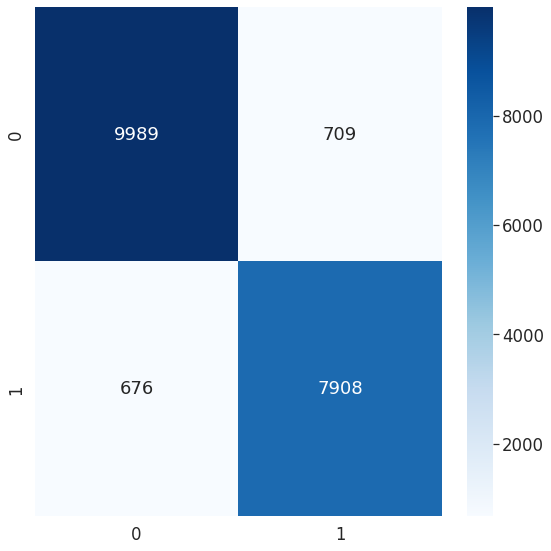

In [ ]:
cm_test = confusion_matrix(y_pred_test, y_test)
print('Confusion Matrix: {}'.format(cm_test))
## visualisasi
sns.heatmap(cm_test, annot=True, fmt='d', cmap="Blues")

##Feature Importance

Kita ingin melihat Feature Importance dari hasil machine learning yang kita pilih

In [ ]:
# view the feature scores
feature_scores = pd.Series(model.feature_importances_, index=X_train_scaled.columns).sort_values(ascending=False)
feature_scores

Group bookings                    0.236383
Group Travel                      0.147067
Hotel wifi service                0.122685
Stay comfort                      0.119681
Common Room entertainment         0.118300
Checkin/Checkout service          0.069755
Hotel location                    0.068200
Other service                     0.037391
Age                               0.033796
Cleanliness                       0.029967
Departure/Arrival  convenience    0.007965
Ease of Online booking            0.006778
Food and drink                    0.001902
Female                            0.000130
Personal Travel                   0.000000
Male                              0.000000
academic                          0.000000
tourism                           0.000000
personal                          0.000000
business                          0.000000
aviation                          0.000000
Individual/Couple                 0.000000
dtype: float32

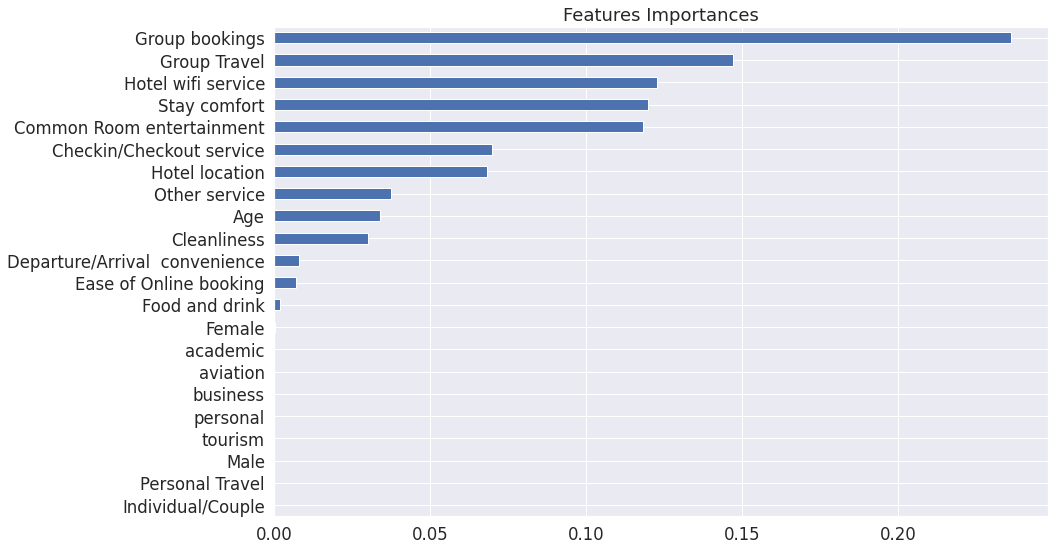

In [ ]:
importances = pd.Series(data=model.feature_importances_,
                        index= X_train_scaled.columns)

importances_sorted = importances.sort_values()
plt.figure(figsize=(15,8))
importances_sorted.plot(kind='barh')
plt.title('Features Importances')
plt.show()

Jika kita lihat Group bookung dan Group Travel ada diurutan paling atas. hal ini seperti visualisasi pada grafik awal yang telah dibuat. Kemudian diikuti Hotel wifi service,stay comfort, dan common room entertainment. Hal itu semakin menguatkan bahwa proses EDA sebelumnya ternyata hasilnya memiliki hasil yang sama seperti apa yang dipelajari oleh machine learning ini 

#Conclusion

Berdasarkan Insight yang kami dapatkan: \
- Terdapat 5 karakteristik pelanggan yang berpotensi “neutral or dissatisfied” terhadap pelayanan yaitu pelanggan dengan gender “female”, purpose of travel “tourism”, type of travel “Group Travel”, type of booking “Individual/Couple”, dan Age “Young” yaitu umur<40 tahun

- Terdapat 3 faktor pelayanan terpenting yang secara signifikan mempengaruhi kepuasan pelanggan, diantaranya  Hotel Wifi Service, Common Room Entertainment, dan Stay comfort. 

Sehingga strategi kami yaitu fokus kepada 3 faktor utama ini untuk dapat meningkatkan rating kepuasan pelanggan terhadap pelayanan hotel terkhususnya kepada pelanggan yang kemungkinannya berpotensi netral/tidak puas. Selain itu, rekomendasi kami yaitu memberikan promo menarik untuk pelanggan yang booking dengan kategori individual/couple.


Berdasarkan hasil dari proses data mining sampai ke modeling & evaluasi, kami mendapatkan model terbaik yang dapat melakukan prediksi apakah pelanggan itu puas atau netral/tidak puas terhadap pelayanan hotel, yaitu model XGBoost Classifier (XGB). Untuk memilih model terbaik, pertama yang menjadi fokus kami adalah score accuracy training dan tesnya yang tertinggi namun tidak overfitting (karena pada dasarnya dataset kami dapat dikatakan balance). Selain itu, kami juga memperhatikan score precision yang tertinggi senilai 0.92 karena kami mau menekan nilai false positif (kondisi dimana hasil prediksi “pelanggan puas” padahal secara aktualnya “pelanggan tidak puas”).



#Help Desk

Jika ada pertanyaan terkait code di atas bisa tanyakan kepada linkedin kami
- https://www.linkedin.com/in/fauzi-reza-a4513a141/
- https://www.linkedin.com/in/aldanestitalentapakpahan/
- https://www.linkedin.com/in/brian-laurensz-21a7a6228/
- https://www.linkedin.com/in/yusfiflo/